# Init

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
df = pd.read_csv("data/GeoData.csv")
df = df[:9]
df

Site Name   SOCt    TN    pH   Clay   SBD     CEC   Latitude  \
0     Ajmiraganj  44.63  0.11  4.03  51.05  1.69  217.27  24.501500   
1     Balagagonj  15.90  0.10  5.76  45.64  2.04  179.09  24.431333   
2      Goainghat  19.37  0.10  6.20  53.40  1.62  215.67  25.022900   
3  Hakaluki Haor  16.70  0.07  4.81  31.06  1.73  147.66  24.301139   
4     Kanairghat  18.37  0.10  4.78  34.33  1.92  159.42  24.282694   
5          Phagu  14.08  0.09  5.54  56.14  1.39  222.82  24.902556   
6         Sarail  13.10  0.12  4.71  30.26  1.93  149.97  24.103722   
7          Sulla  24.45  0.11  4.79  30.59  1.97  159.99  24.592194   
8     Terchibari  19.17  0.12  5.85  62.77  1.45  280.36  24.810611   

   Longitude   Stock                        LandUse  
0  91.376917  351.12          Irrigated Boro-Fallow  
1  91.227111  148.71  Jute-T Aman-Fallow/Rabi Crops  
2  91.197500  149.95              Rabi Crops-Fallow  
3  91.534306  109.14                    Boro-Fallow  
4  91.244306  151.46                      Grassland  
5  91.005250   98.34                    Boro-Fallow  
6  91.144583   96.25                 Irrigated Boro  
7  91.300389  225.03                    Boro-Fallow  
8  91.380500  128.83                    Boro-Fallow

In [3]:
df.columns

Index(['Site Name', 'SOCt', 'TN', 'pH', 'Clay', 'SBD', 'CEC', 'Latitude',
       'Longitude', 'Stock', 'LandUse'],
      dtype='object')

In [4]:
numeric = df[['SOCt', 'TN', 'pH', 'Clay', 'SBD', 'CEC' , 'Stock']]

In [5]:
numeric.corr()

SOCt        TN        pH      Clay       SBD       CEC     Stock
SOCt   1.000000  0.234572 -0.566724  0.173290 -0.037588  0.218522  0.973220
TN     0.234572  1.000000 -0.040606  0.193851  0.117431  0.335256  0.272903
pH    -0.566724 -0.040606  1.000000  0.560996 -0.349261  0.477087 -0.555164
Clay   0.173290  0.193851  0.560996  1.000000 -0.765616  0.957528  0.079278
SBD   -0.037588  0.117431 -0.349261 -0.765616  1.000000 -0.783588  0.136049
CEC    0.218522  0.335256  0.477087  0.957528 -0.783588  1.000000  0.110861
Stock  0.973220  0.272903 -0.555164  0.079278  0.136049  0.110861  1.000000

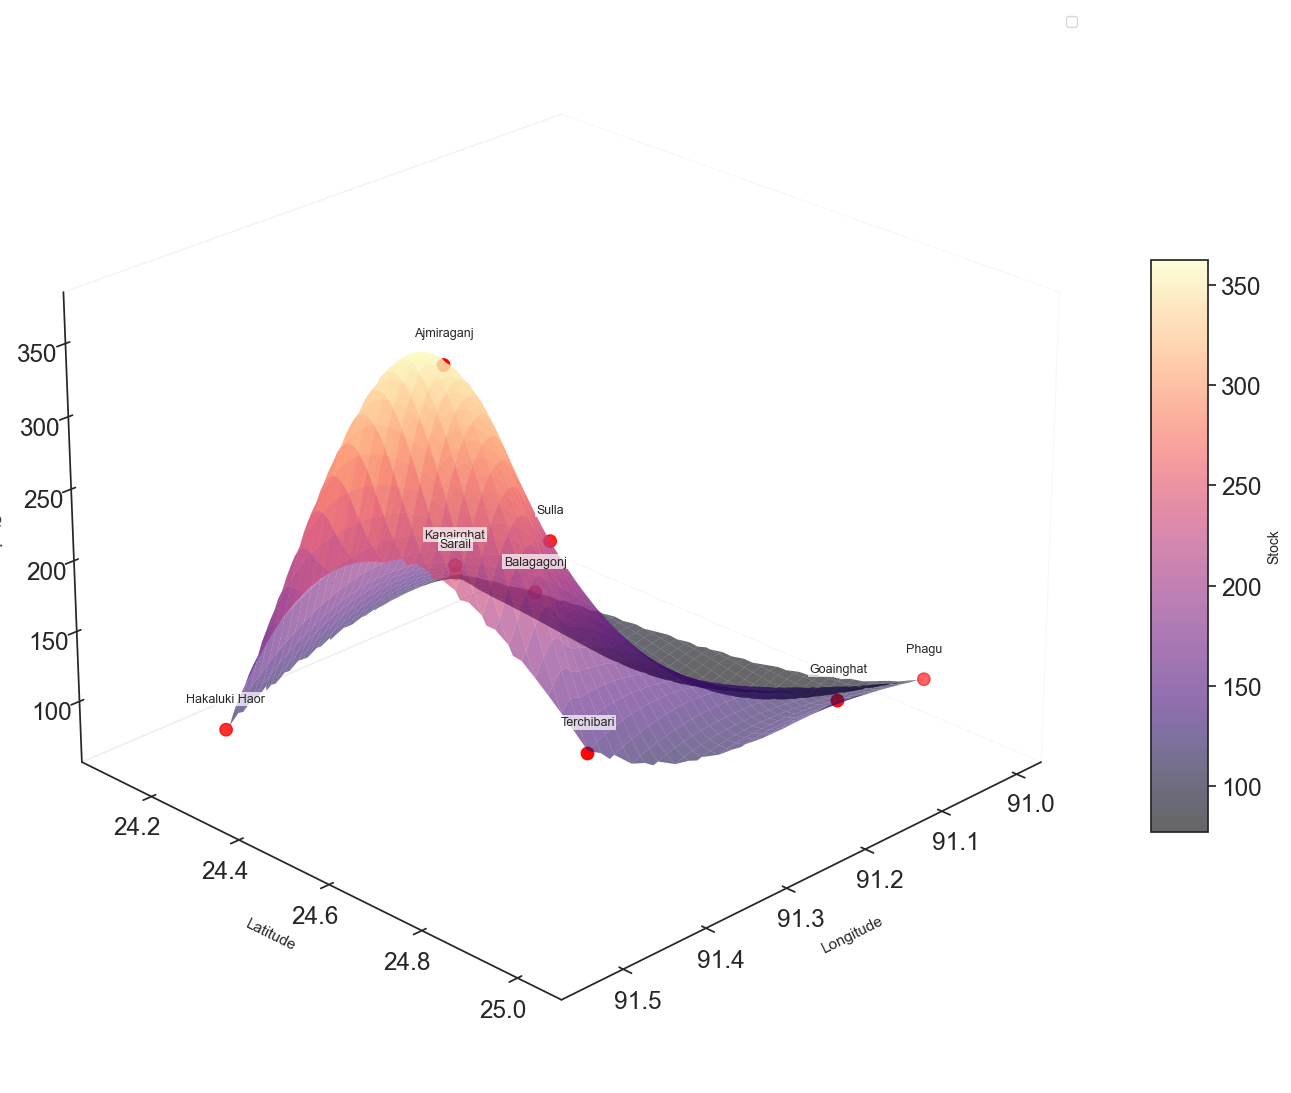

In [168]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

x = df['Longitude']
y = df['Latitude']
z = df['Stock']
site_names = df['Site Name']

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

zi = griddata((x, y), z, (xi, yi), method='cubic')
surf = ax.plot_surface(xi, yi, zi, cmap='magma', alpha=0.6, 
                      linewidth=0, antialiased=True)

scatter = ax.scatter(x, y, z, c='red', s=80, depthshade=True, label='')

# Add site name labels with small offset
for i, name in enumerate(site_names):
    ax.text(x.iloc[i], y.iloc[i], z.iloc[i] + 0.05*z.max(),  # Z-offset for visibility
            name, fontsize=9, ha='center', va='bottom',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# Add color bar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Stock')
cbar.ax.yaxis.label.set_size(10)

ax.set_xlabel('Longitude', fontsize=11, labelpad=12)
ax.set_ylabel('Latitude', fontsize=11, labelpad=12)
ax.set_zlabel('Stock', fontsize=11, labelpad=12)

# Adjust viewing angle and legend
ax.view_init(elev=25, azim=45)
ax.legend(fontsize=10, loc='upper right')

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
plt.show()

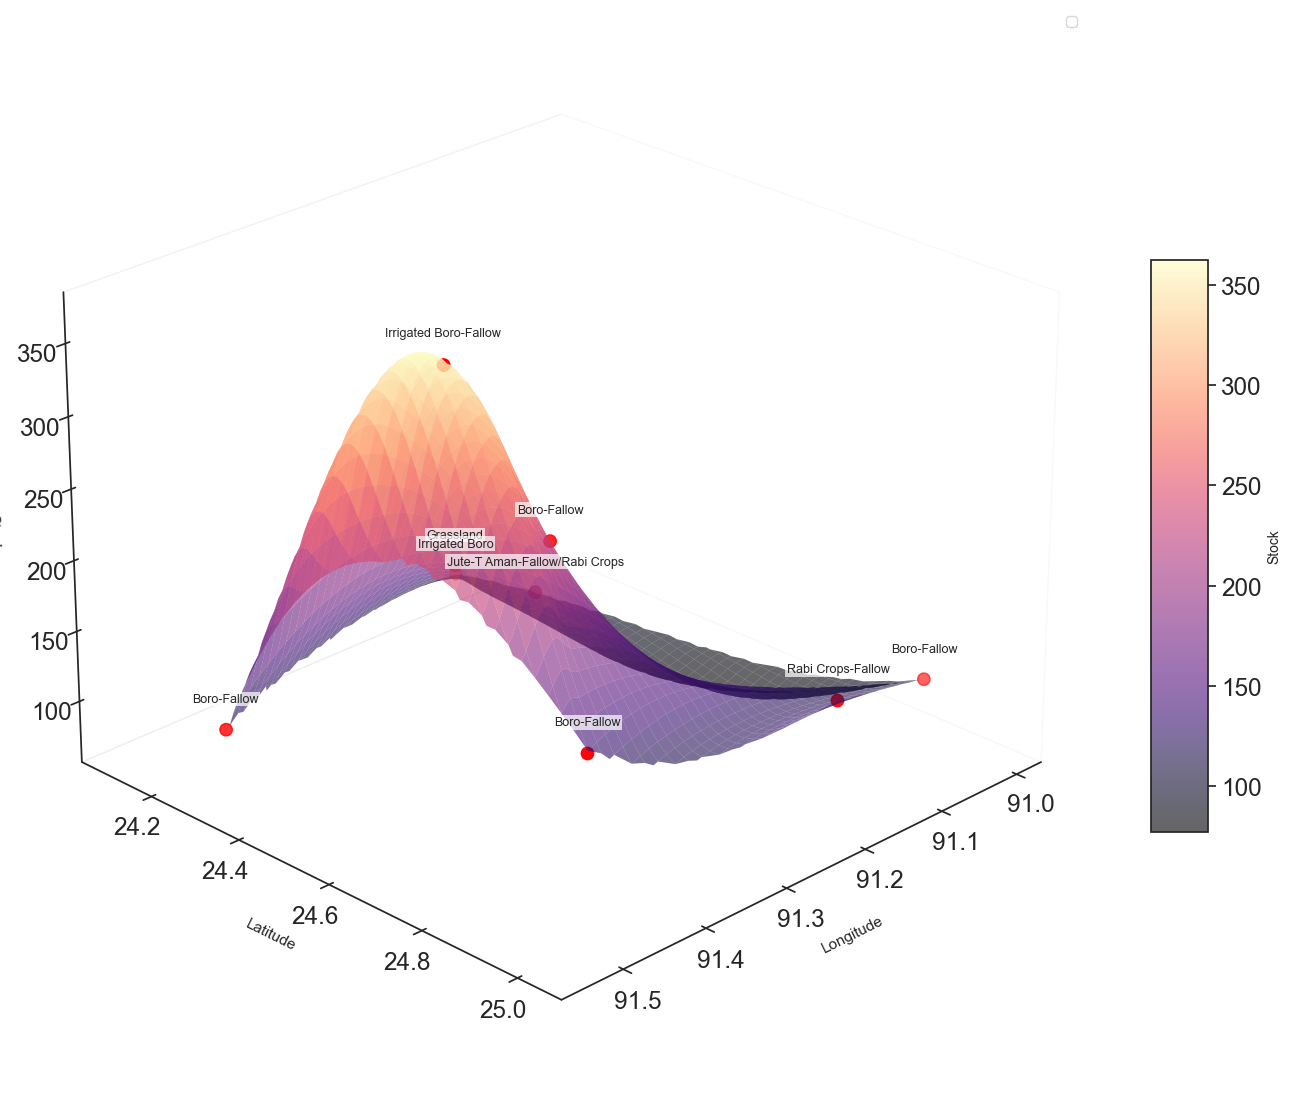

In [190]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

x = df['Longitude']
y = df['Latitude']
z = df['Stock']
site_names = df['LandUse']

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

zi = griddata((x, y), z, (xi, yi), method='cubic')
surf = ax.plot_surface(xi, yi, zi, cmap='magma', alpha=0.6, 
                      linewidth=0, antialiased=True)

scatter = ax.scatter(x, y, z, c='red', s=80, depthshade=True, label='')

# Add site name labels with small offset
for i, name in enumerate(site_names):
    ax.text(x.iloc[i], y.iloc[i], z.iloc[i] + 0.05*z.max(),  # Z-offset for visibility
            name, fontsize=9, ha='center', va='bottom',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# Add color bar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Stock')
cbar.ax.yaxis.label.set_size(10)

ax.set_xlabel('Longitude', fontsize=11, labelpad=12)
ax.set_ylabel('Latitude', fontsize=11, labelpad=12)
ax.set_zlabel('Stock', fontsize=11, labelpad=12)

# Adjust viewing angle and legend
ax.view_init(elev=25, azim=45)
ax.legend(fontsize=10, loc='upper right')

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
plt.show()

# Present

In [6]:
ps = pd.read_csv("data/MainCc.csv")
ps.head()

Location                        LandUse   Latitude  Longitude   pHT  \
0  Ajmiriganj          Irrigated Boro-Fallow  24.501500  91.376917  4.10   
1    Balaganj  Jute-T Aman-Fallow/Rabi Crops  24.431333  91.227111  5.39   
2   Goainghat              Rabi Crops-Fallow  25.022900  91.197500  5.86   
3    Hakaluki                    Boro-Fallow  24.301139  91.534306  4.34   
4  Kanairghat                      Grassland  24.282694  91.244306  4.02   

    pHS   TNT   TNS  ClayT  ClayS  ...  SOC%T  SOC%S  SOCwT  SOCwS   SOCT  \
0  3.97  0.15  0.08  55.44  46.66  ...  2.630   1.83  26.30  18.33  44.63   
1  6.14  0.12  0.08  49.63  41.66  ...  0.960   0.63   9.60   6.30  15.90   
2  6.54  0.11  0.09  67.56  39.24  ...  1.100   0.84  11.00   8.37  19.37   
3  5.28  0.11  0.04  33.56  28.57  ...  1.325   0.35  13.25   3.45  16.70   
4  5.54  0.13  0.07  35.96  32.70  ...  1.220   0.62  12.20   6.17  18.37   

    SOCiT   SOCiS   Stock    CECT    CECS  
0  122.69  228.43  351.12  198.75  235.79  
1   59.04   89.67  148.71  206.90  151.29  
2   45.21  104.44  149.65  271.50  159.84  
3   65.79   43.35  109.14  167.48  127.84  
4   61.67   89.79  151.46  180.39  138.46  

[5 rows x 22 columns]

In [7]:
ps.columns

Index(['Location', 'LandUse', 'Latitude', 'Longitude', 'pHT', 'pHS', 'TNT',
       'TNS', 'ClayT', 'ClayS', 'SBDT', 'SBDS', 'SOC%T', 'SOC%S', 'SOCwT',
       'SOCwS', 'SOCT', 'SOCiT', 'SOCiS', 'Stock', 'CECT', 'CECS'],
      dtype='object')

In [8]:
common_cols = ['Location', 'LandUse', 'Latitude', 'Longitude', "Stock", "SOCT"]

measure_cols = [col for col in ps.columns if col not in common_cols]

top_measures = [col for col in measure_cols if col.endswith('T')]
sub_measures = [col for col in measure_cols if col.endswith('S')]

pst = ps[common_cols + top_measures]
pss = ps[common_cols + sub_measures]

pst.columns = [col[:-1] if col in top_measures else col for col in pst.columns]
pss.columns = [col[:-1] if col in sub_measures else col for col in pss.columns]

In [34]:
pst.head()

Location                        LandUse   Latitude  Longitude   Stock  \
0  Ajmiriganj          Irrigated Boro-Fallow  24.501500  91.376917  351.12   
1    Balaganj  Jute-T Aman-Fallow/Rabi Crops  24.431333  91.227111  148.71   
2   Goainghat              Rabi Crops-Fallow  25.022900  91.197500  149.65   
3    Hakaluki                    Boro-Fallow  24.301139  91.534306  109.14   
4  Kanairghat                      Grassland  24.282694  91.244306  151.46   

    SOCT    pH    TN   Clay   SBD   SOC%   SOCw    SOCi     CEC  
0  44.63  4.10  0.15  55.44  1.56  2.630  26.30  122.69  198.75  
1  15.90  5.39  0.12  49.63  2.05  0.960   9.60   59.04  206.90  
2  19.37  5.86  0.11  67.56  1.37  1.100  11.00   45.21  271.50  
3  16.70  4.34  0.11  33.56  1.66  1.325  13.25   65.79  167.48  
4  18.37  4.02  0.13  35.96  1.69  1.220  12.20   61.67  180.39

In [14]:
pst = pst[:9]
pss = pss[:9]

In [15]:
pst.to_csv("data/PresentTopSoil.csv", index=False)
pss.to_csv("data/PresentSubSoil.csv", index=False)

In [35]:
pst.columns

Index(['Location', 'LandUse', 'Latitude', 'Longitude', 'Stock', 'SOCT', 'pH',
       'TN', 'Clay', 'SBD', 'SOC%', 'SOCw', 'SOCi', 'CEC'],
      dtype='object')

## TopSoil

In [174]:
numpst = pst[['Stock', 'SOCT', 'pH',
       'TN', 'Clay', 'SBD', 'SOC%', 'SOCi', 'CEC']]

In [175]:
numpst = numpst[:9]

In [176]:
numpst.describe()

Stock       SOCT        pH        TN       Clay       SBD  \
count    9.000000   9.000000  9.000000  9.000000   9.000000  9.000000   
mean   162.058889  20.641111  4.744444  0.122222  48.021111  1.654444   
std     80.970248   9.597130  0.685768  0.014814  14.839300  0.247442   
min     96.250000  13.100000  4.020000  0.100000  31.690000  1.250000   
25%    109.140000  15.900000  4.190000  0.110000  35.960000  1.560000   
50%    148.710000  18.370000  4.340000  0.120000  48.880000  1.660000   
75%    151.460000  19.370000  5.250000  0.130000  55.440000  1.840000   
max    351.120000  44.630000  5.860000  0.150000  72.200000  2.050000   

           SOC%        SOCi         CEC  
count  9.000000    9.000000    9.000000  
mean   1.274444   62.692222  211.753333  
std    0.556700   26.532649   52.802464  
min    0.635000   30.670000  167.480000  
25%    1.035000   45.210000  180.390000  
50%    1.140000   59.040000  198.750000  
75%    1.325000   65.790000  206.900000  
max    2.630000  122.690000  325.000000

In [60]:
corr = numpst.corr()
corr

Stock      SOCT        pH        TN      Clay       SBD      SOC%  \
Stock  1.000000  0.973213 -0.348410  0.811916  0.088715 -0.036490  0.917883   
SOCT   0.973213  1.000000 -0.217537 -0.052393  0.370395 -0.165148  0.368397   
pH    -0.348410 -0.217537  1.000000 -0.491932  0.002217 -0.221654 -0.662791   
TN     0.811916 -0.052393 -0.491932  1.000000  0.365122  0.207895  0.802981   
Clay   0.088715  0.370395  0.002217  0.365122  1.000000 -0.355147  0.316118   
SBD   -0.036490 -0.165148 -0.221654  0.207895 -0.355147  1.000000  0.012071   
SOC%   0.917883  0.368397 -0.662791  0.802981  0.316118  0.012071  1.000000   
SOCi   0.901252  0.594697 -0.644540  0.673864  0.247973  0.256809  0.902082   
CEC   -0.137631 -0.048407  0.687553 -0.002104  0.930260 -0.749703 -0.159026   

           SOCi       CEC  
Stock  0.901252 -0.137631  
SOCT   0.594697 -0.048407  
pH    -0.644540  0.687553  
TN     0.673864 -0.002104  
Clay   0.247973  0.930260  
SBD    0.256809 -0.749703  
SOC%   0.902082 -0.159026  
SOCi   1.000000 -0.400839  
CEC   -0.400839  1.000000

In [111]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(numpst)

X_imputed = pd.DataFrame(X_imputed, columns=numpst.columns)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

loadings = pd.DataFrame(pca.components_.T,
                       columns=['PC1', 'PC2', "PC3"],
                       index=features)
print("\nPCA Loadings:")
print(loadings)

Explained variance ratio: [0.43883243 0.25771578 0.14745141]
Total explained variance: 0.8439996272261809

PCA Loadings:
            PC1       PC2       PC3
Stock  0.378279  0.094001  0.420119
SOCT   0.280812  0.222749  0.595836
pH    -0.357786  0.203603  0.163500
TN     0.361330  0.038044 -0.557172
Clay   0.136228  0.520113 -0.228729
SBD    0.096619 -0.521468 -0.116305
SOC%   0.473538  0.082916 -0.165113
SOCi   0.495446 -0.022970  0.053170
CEC   -0.147926  0.590590 -0.188080


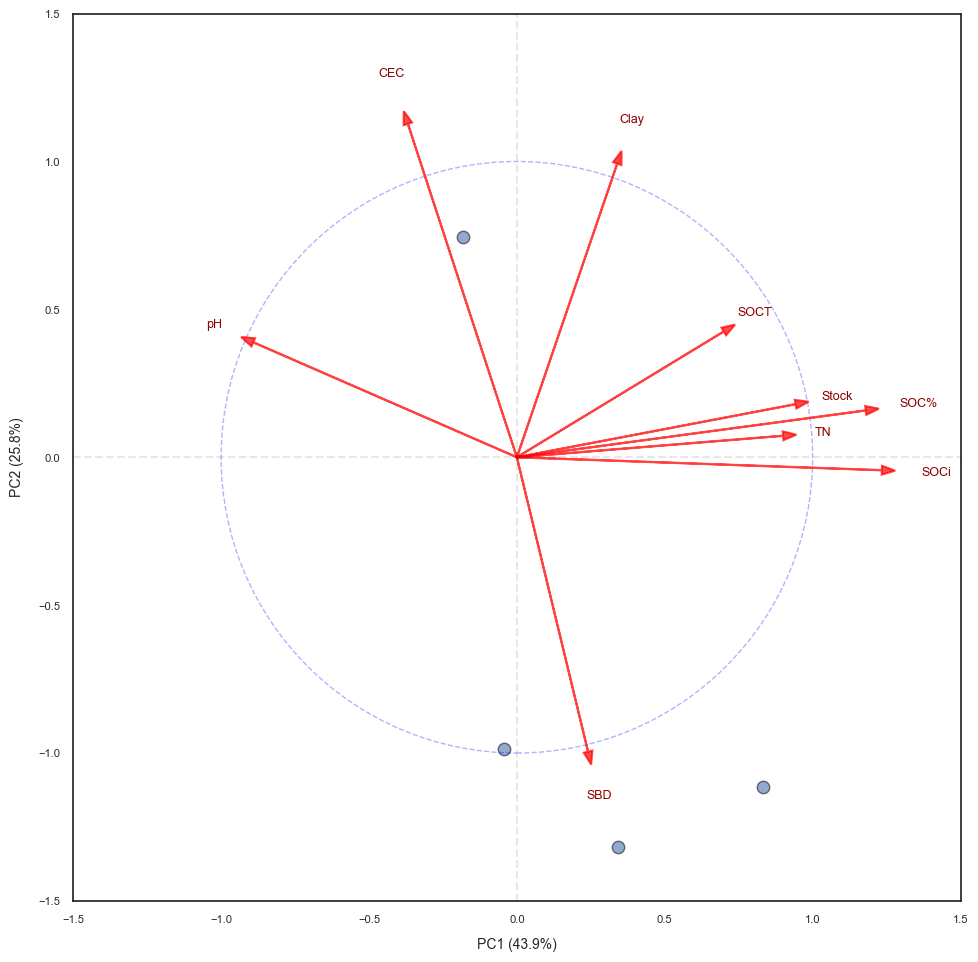

In [113]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 10))
plt.scatter(principal_components[:, 0], principal_components[:, 1], 
            alpha=0.6, edgecolor='k', s=80)

circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--', alpha=0.3)
plt.gca().add_artist(circle)

features = numpss.columns
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

scale_factor = 1.2  

for i, feature in enumerate(features):
    plt.arrow(0, 0, 
              loadings[i, 0] * scale_factor, 
              loadings[i, 1] * scale_factor,
              color='red', alpha=0.7, head_width=0.03, linewidth=1.5)
    plt.text(loadings[i, 0] * scale_factor * 1.15, 
             loadings[i, 1] * scale_factor * 1.15,
             feature, color='darkred', ha='center', va='center',
             fontsize=9, fontweight='normal')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', 
          fontsize=10, labelpad=10)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', 
          fontsize=10, labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=6)
plt.grid(False)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.1)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.1)
plt.gca().set_aspect('equal')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.tight_layout()
plt.show()

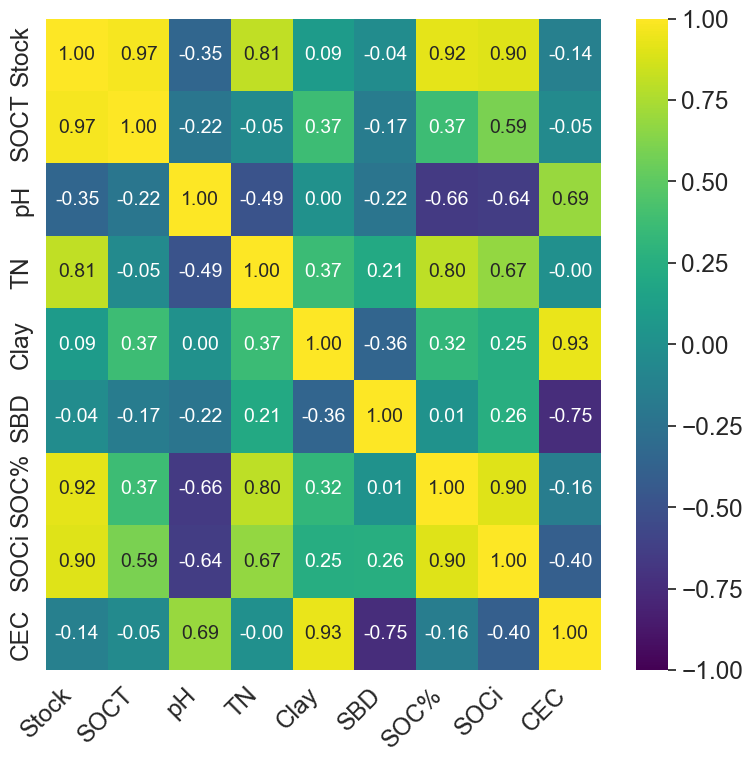

In [62]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', 
                      vmin=-1, vmax=1, center=0, annot_kws={'size': 14}) 

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

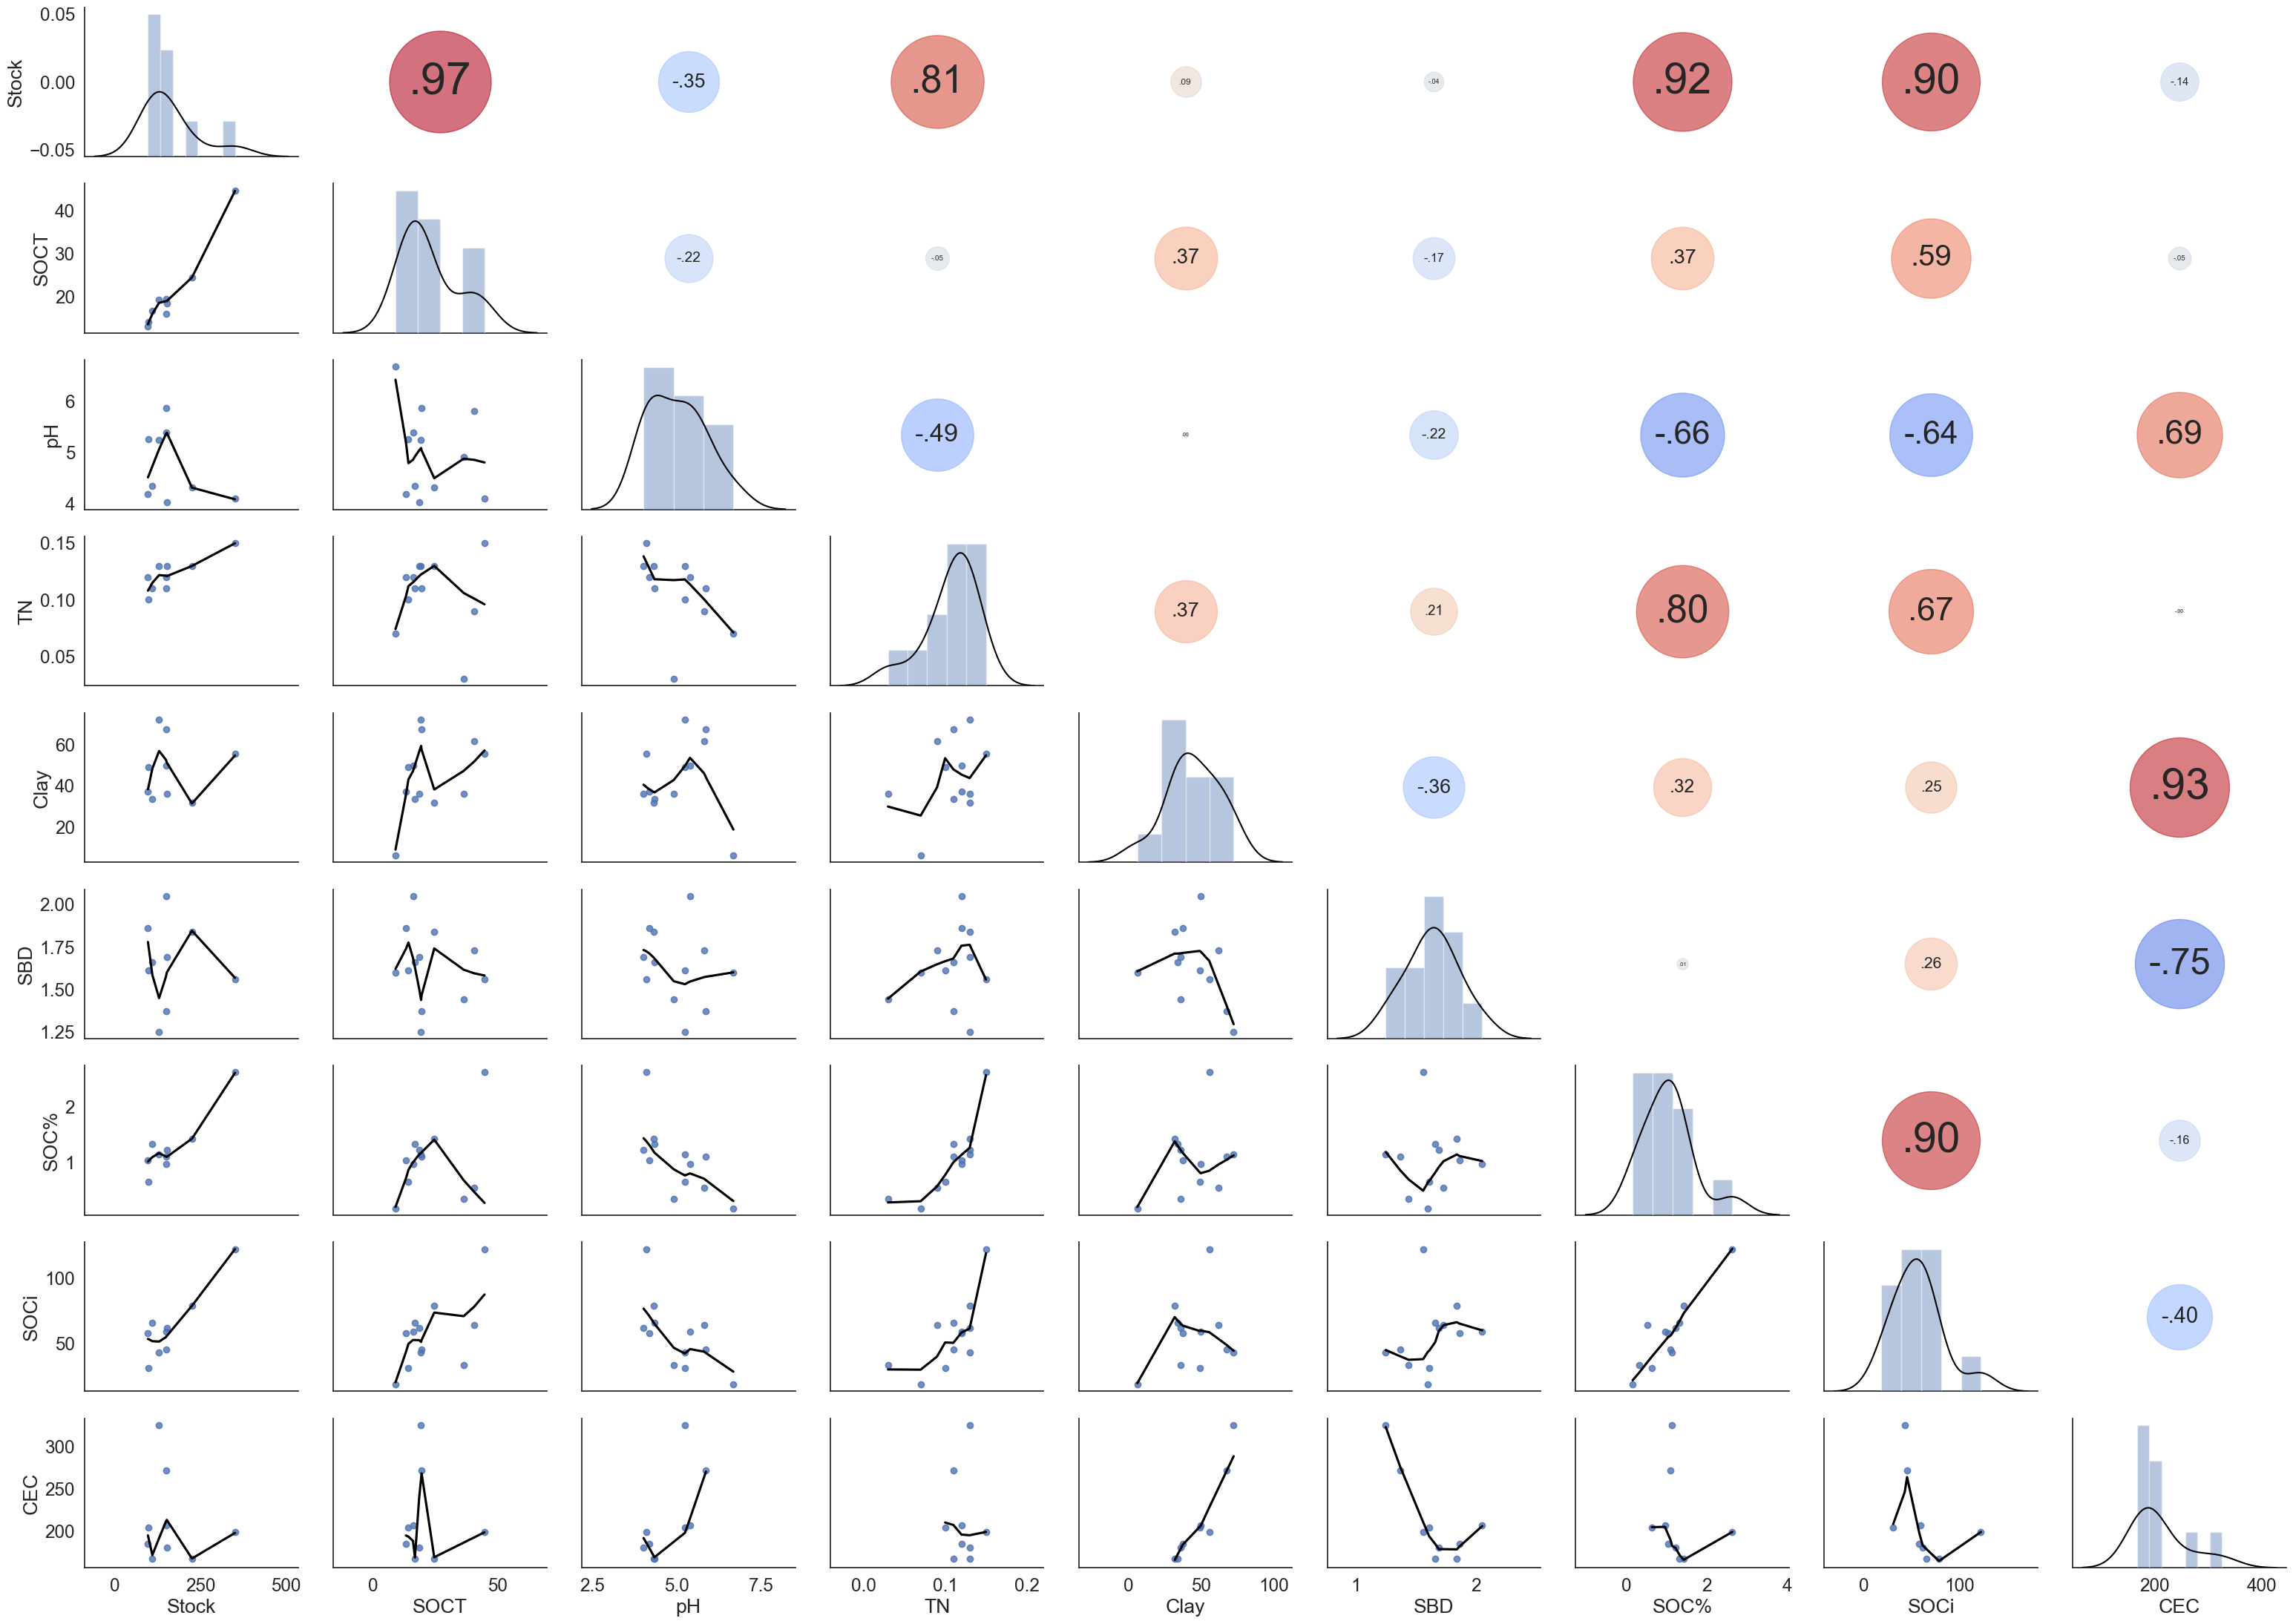

In [65]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(numpst, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

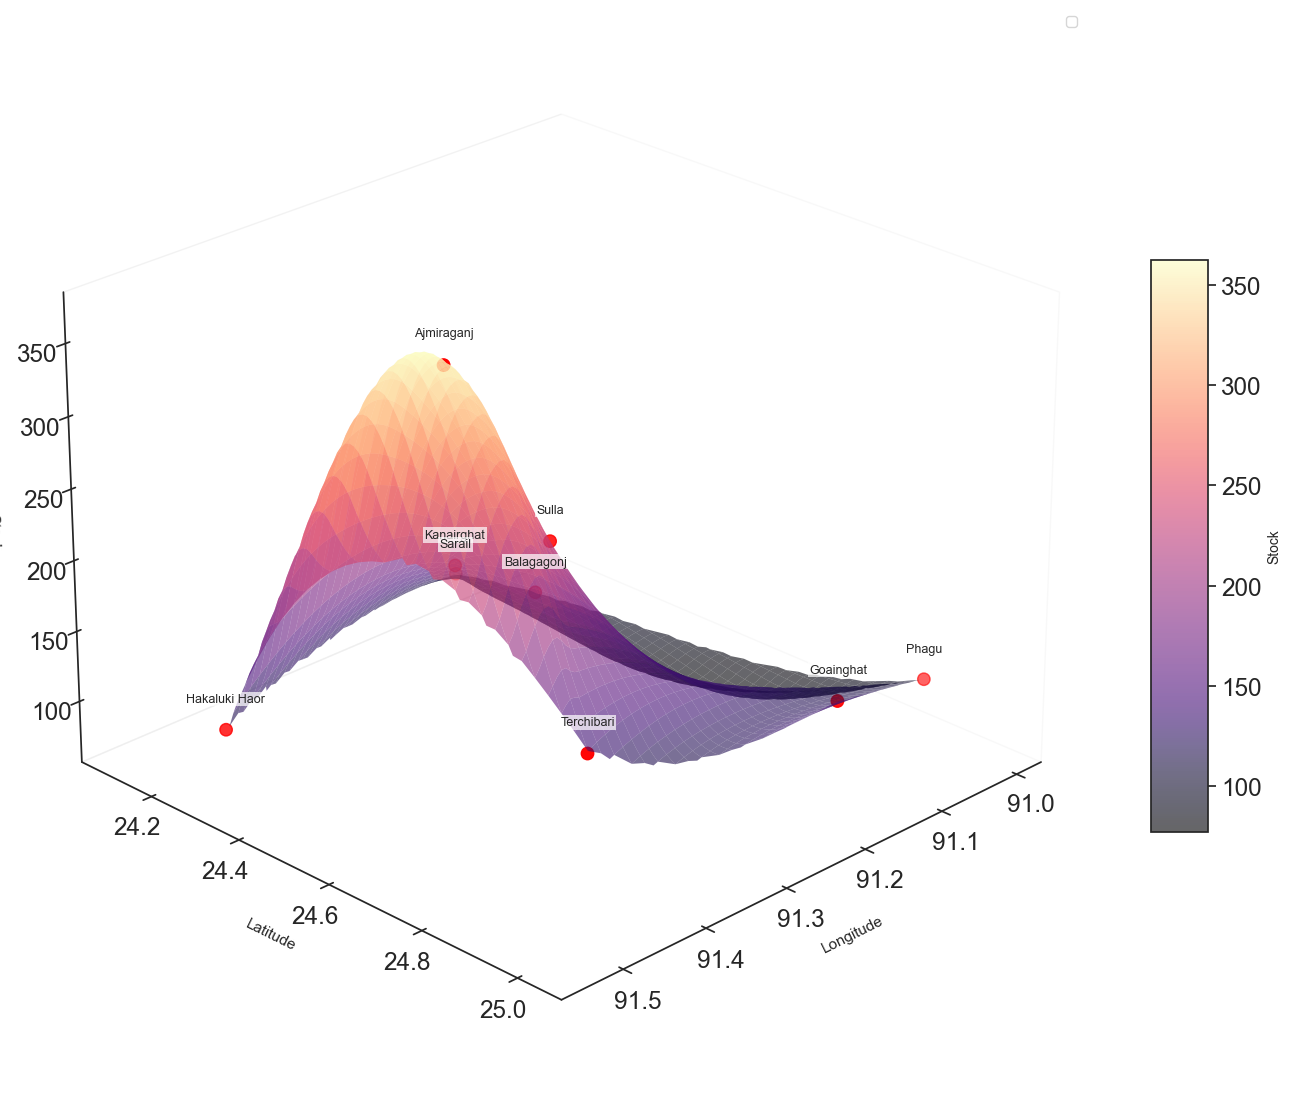

In [177]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

x = df['Longitude']
y = df['Latitude']
z = numpst['Stock']
site_names = df['Site Name']

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

zi = griddata((x, y), z, (xi, yi), method='cubic')
surf = ax.plot_surface(xi, yi, zi, cmap='magma', alpha=0.6, 
                      linewidth=0, antialiased=True)

scatter = ax.scatter(x, y, z, c='red', s=80, depthshade=True, label='')

# Add site name labels with small offset
for i, name in enumerate(site_names):
    ax.text(x.iloc[i], y.iloc[i], z.iloc[i] + 0.05*z.max(),  # Z-offset for visibility
            name, fontsize=9, ha='center', va='bottom',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# Add color bar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Stock')
cbar.ax.yaxis.label.set_size(10)

ax.set_xlabel('Longitude', fontsize=11, labelpad=12)
ax.set_ylabel('Latitude', fontsize=11, labelpad=12)
ax.set_zlabel('Stock', fontsize=11, labelpad=12)

# Adjust viewing angle and legend
ax.view_init(elev=25, azim=45)
ax.legend(fontsize=10, loc='upper right')

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
plt.show()

## Subsoil

In [179]:
numpss = pss[['Stock', 'SOCT', 'pH',
       'TN', 'Clay', 'SBD', 'SOC%', 'SOCi', 'CEC']]

In [180]:
numpss = numpss[:9]
numpss

Stock   SOCT    pH    TN   Clay   SBD  SOC%    SOCi     CEC
0  351.12  44.63  3.97  0.08  46.66  1.78  1.83  228.43  235.79
1  148.71  15.90  6.14  0.08  41.66  2.03  0.63   89.67  151.29
2  149.65  19.37  6.54  0.09  39.24  1.78  0.84  104.44  159.84
3  109.14  16.70  5.28  0.04  28.57  1.80  0.35   43.35  127.84
4  151.46  18.37  5.54  0.07  32.70  2.08  0.62   89.79  138.46
5   98.34  14.08  5.83  0.07  63.41  1.25  0.77   67.67  241.66
6   96.25  13.10  5.22  0.13  23.26  2.00  0.28   38.50  115.65
7  225.03  24.45  5.27  0.08  29.50  2.05  1.02  146.37  152.49
8  128.83  19.17  6.47  0.12  53.34  1.58  0.78   86.08  235.72

In [69]:
numpss.describe()

Stock       SOCT         pH         TN       Clay        SBD  \
count    9.000000  12.000000  12.000000  12.000000  12.000000  12.000000   
mean   162.058889  22.624167   4.206667   8.257500  30.251667   1.512500   
std     80.970248  11.558082   2.582051  17.862259  20.539641   0.614508   
min     96.250000   8.880000   0.070000   0.040000   1.480000   0.200000   
25%    109.140000  15.445000   2.997500   0.077500  17.862500   1.140000   
50%    148.710000  18.770000   5.275000   0.085000  31.100000   1.780000   
75%    151.460000  27.402500   5.907500   1.597500  42.910000   2.007500   
max    351.120000  44.630000   6.540000  50.000000  63.410000   2.080000   

            SOC%        SOCi         CEC  
count  12.000000   12.000000    9.000000  
mean    2.093333   91.282500  173.193333  
std     2.807682   54.358203   50.220602  
min     0.280000   26.800000  115.650000  
25%     0.627500   61.590000  138.460000  
50%     0.810000   87.875000  152.490000  
75%     1.872500  104.520000  235.720000  
max     8.100000  228.430000  241.660000

In [59]:
corr = numpss.corr()
corr

Stock      SOCT        pH        TN      Clay       SBD      SOC%  \
Stock  1.000000  0.973213 -0.681202 -0.107798  0.051639  0.202245  0.928803   
SOCT   0.973213  1.000000 -0.430110  0.612430 -0.211607 -0.110840  0.684069   
pH    -0.681202 -0.430110  1.000000 -0.799502  0.847787  0.843940 -0.829002   
TN    -0.107798  0.612430 -0.799502  1.000000 -0.696340 -0.607489  0.987142   
Clay   0.051639 -0.211607  0.847787 -0.696340  1.000000  0.585122 -0.676978   
SBD    0.202245 -0.110840  0.843940 -0.607489  0.585122  1.000000 -0.632022   
SOC%   0.928803  0.684069 -0.829002  0.987142 -0.676978 -0.632022  1.000000   
SOCi   0.980299  0.713501  0.127598 -0.058848  0.321343  0.341148  0.042198   
CEC    0.341327  0.439327 -0.034545  0.089234  0.916662 -0.773065  0.638717   

           SOCi       CEC  
Stock  0.980299  0.341327  
SOCT   0.713501  0.439327  
pH     0.127598 -0.034545  
TN    -0.058848  0.089234  
Clay   0.321343  0.916662  
SBD    0.341148 -0.773065  
SOC%   0.042198  0.638717  
SOCi   1.000000  0.454368  
CEC    0.454368  1.000000

In [86]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(numpss)

X_imputed = pd.DataFrame(X_imputed, columns=numpss.columns)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

loadings = pd.DataFrame(pca.components_.T,
                       columns=['PC1', 'PC2', "PC3"],
                       index=features)
print("\nPCA Loadings:")
print(loadings)

Explained variance ratio: [0.47978286 0.31330615 0.12984049]
Total explained variance: 0.9229294963368981

PCA Loadings:
            PC1       PC2       PC3
Stock  0.094016  0.518693 -0.173155
SOCT   0.295231  0.429645 -0.171986
pH    -0.457529  0.072108 -0.047870
TN     0.449104 -0.033121 -0.037861
Clay  -0.383907  0.239465  0.337934
SBD   -0.364214  0.159759 -0.484041
SOC%   0.460757  0.032706 -0.007909
SOCi  -0.002331  0.581172 -0.163802
CEC    0.025172  0.344049  0.749216


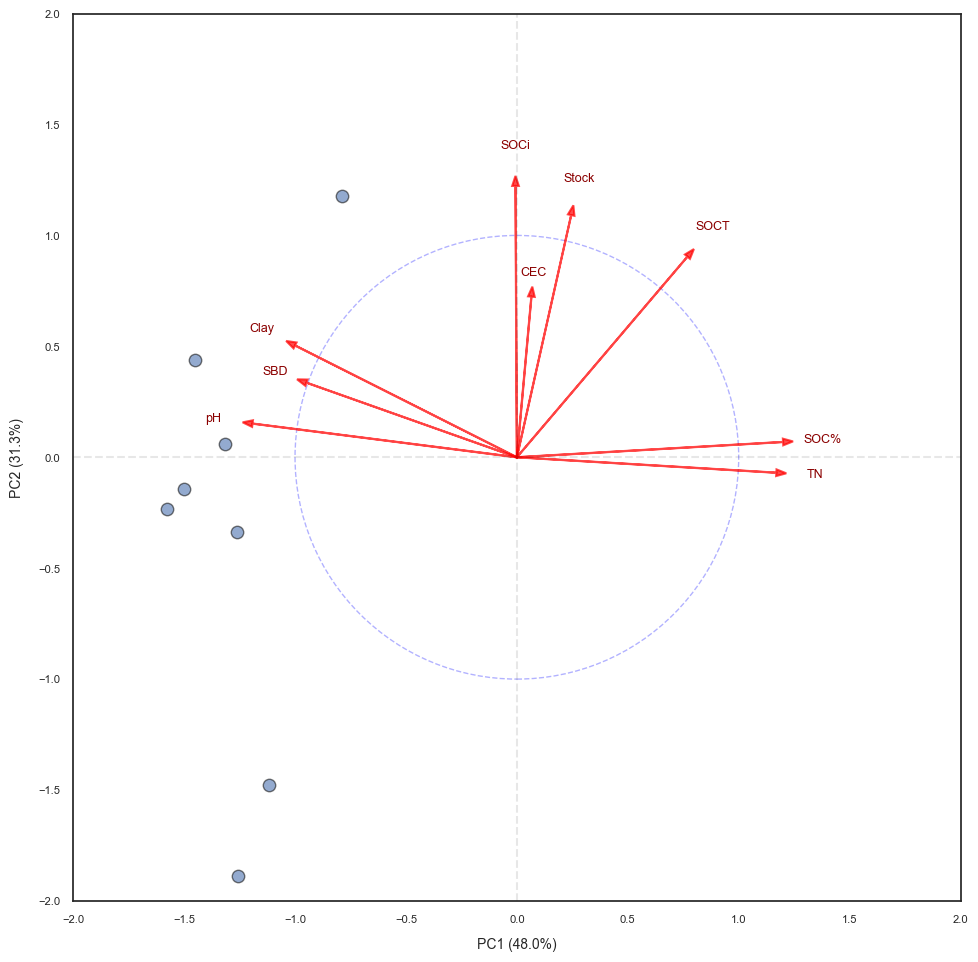

In [110]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 10))
plt.scatter(principal_components[:, 0], principal_components[:, 1], 
            alpha=0.6, edgecolor='k', s=80)

circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--', alpha=0.3)
plt.gca().add_artist(circle)

features = numpss.columns
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

scale_factor = 1.2  

for i, feature in enumerate(features):
    plt.arrow(0, 0, 
              loadings[i, 0] * scale_factor, 
              loadings[i, 1] * scale_factor,
              color='red', alpha=0.7, head_width=0.03, linewidth=1.5)
    plt.text(loadings[i, 0] * scale_factor * 1.15, 
             loadings[i, 1] * scale_factor * 1.15,
             feature, color='darkred', ha='center', va='center',
             fontsize=9, fontweight='normal')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', 
          fontsize=10, labelpad=10)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', 
          fontsize=10, labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=6)
plt.grid(False)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.1)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.1)
plt.gca().set_aspect('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.tight_layout()
plt.show()

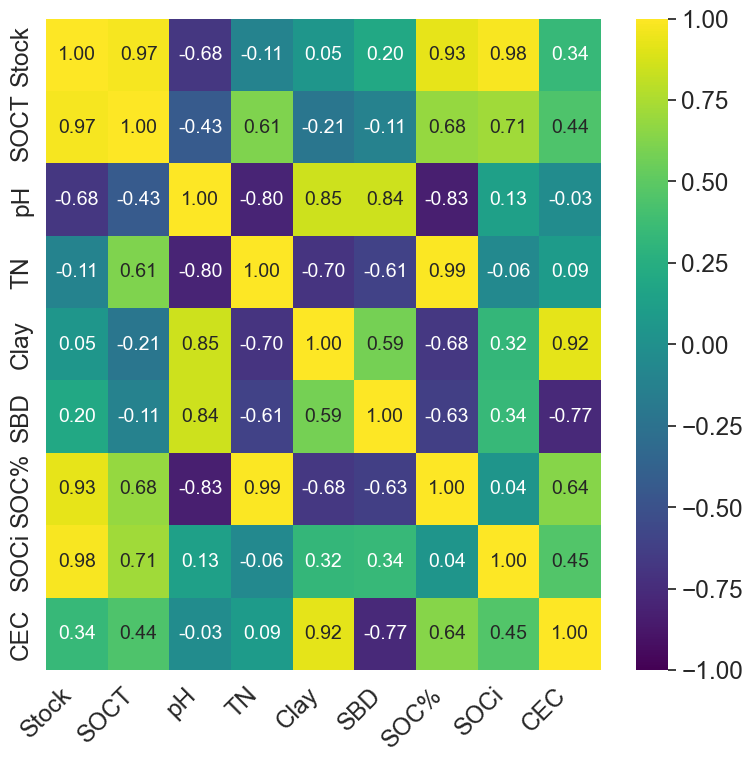

In [56]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', 
                      vmin=-1, vmax=1, center=0, annot_kws={'size': 14}) 

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

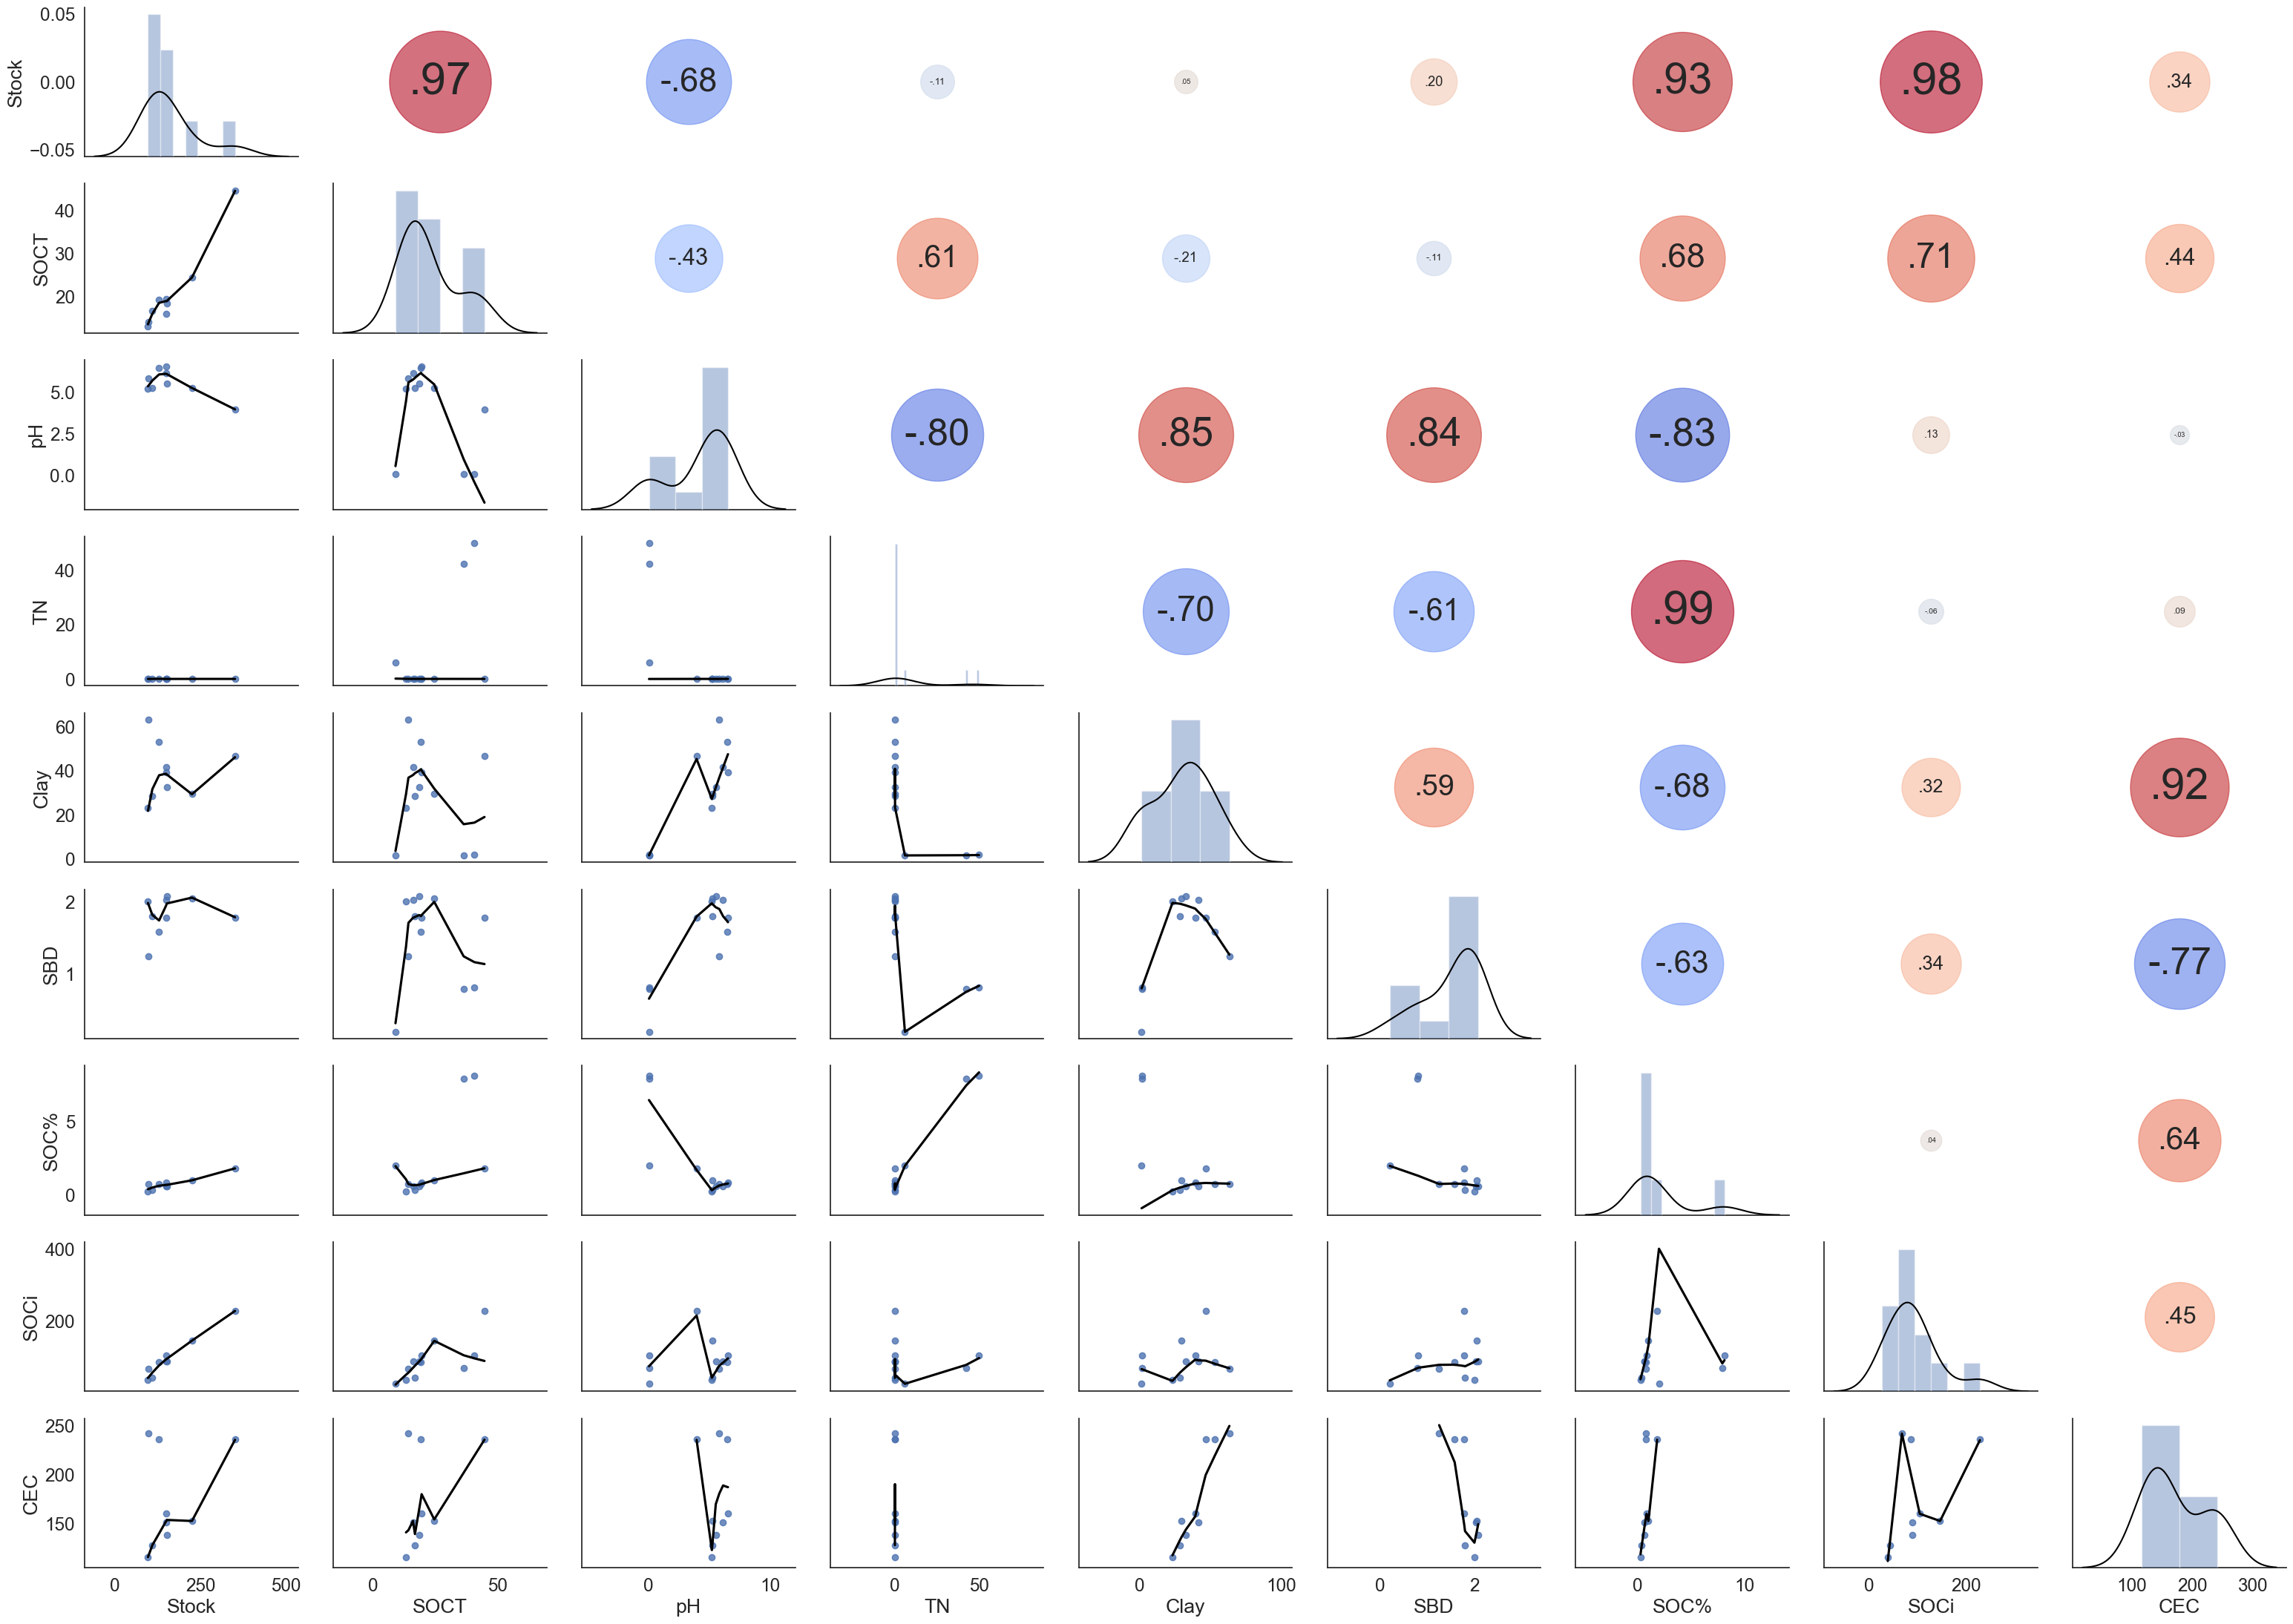

In [66]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(numpss, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

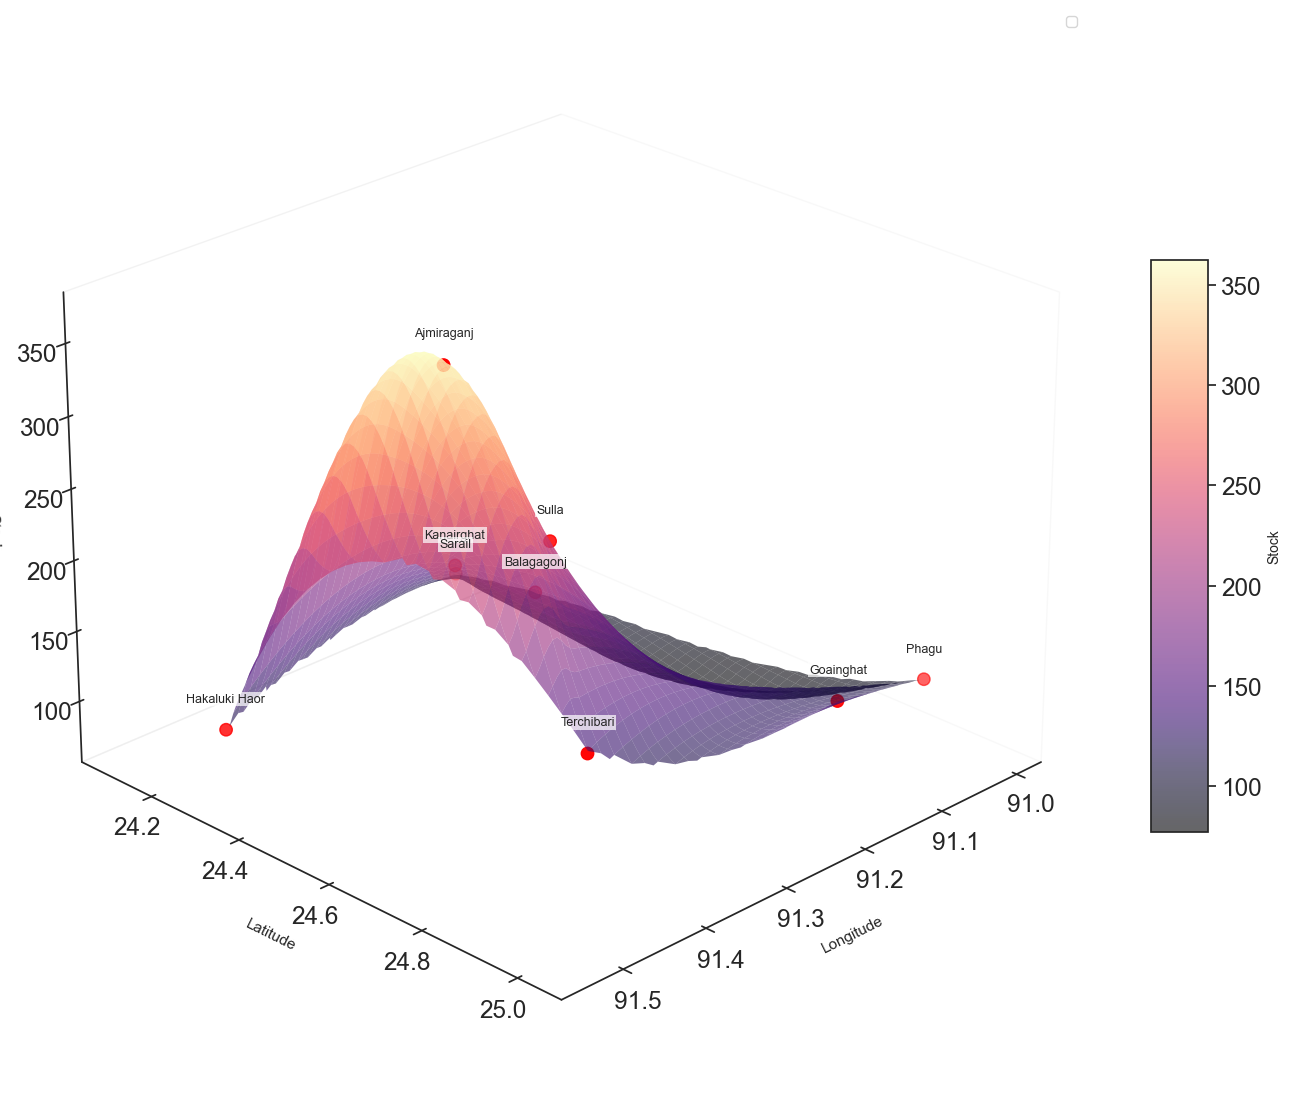

In [181]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

x = df['Longitude']
y = df['Latitude']
z = numpss['Stock']
site_names = df['Site Name']

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

zi = griddata((x, y), z, (xi, yi), method='cubic')
surf = ax.plot_surface(xi, yi, zi, cmap='magma', alpha=0.6, 
                      linewidth=0, antialiased=True)

scatter = ax.scatter(x, y, z, c='red', s=80, depthshade=True, label='')

# Add site name labels with small offset
for i, name in enumerate(site_names):
    ax.text(x.iloc[i], y.iloc[i], z.iloc[i] + 0.05*z.max(),  # Z-offset for visibility
            name, fontsize=9, ha='center', va='bottom',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# Add color bar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Stock')
cbar.ax.yaxis.label.set_size(10)

ax.set_xlabel('Longitude', fontsize=11, labelpad=12)
ax.set_ylabel('Latitude', fontsize=11, labelpad=12)
ax.set_zlabel('Stock', fontsize=11, labelpad=12)

# Adjust viewing angle and legend
ax.view_init(elev=25, azim=45)
ax.legend(fontsize=10, loc='upper right')

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
plt.show()

# Previous

In [10]:
pv = pd.read_csv("data/MainPp.csv")
pv.head()

Location                        LandUse   Latitude  Longitude   pHT  \
0  Ajmiriganj          Irrigated Boro-Fallow  24.501500  91.376917  4.80   
1    Balaganj  Jute-T Aman-Fallow/Rabi Crops  24.431333  91.227111  5.18   
2  Goaninghat              Rabi Crops-Fallow  25.022900  91.197500  5.25   
3    Hakaluki                    Boro-Fallow  24.301139  91.534306  5.60   
4  Kanairghat                      Grassland  24.282694  91.244306  4.40   

    pHS   TNT   TNS  ClayT  ClayS  ...  SOC%T  SOC%S  SOCwT   SOCwS    SOCT  \
0  5.40  0.16  0.07  56.00  40.33  ...  1.230   0.41  12.30    4.07   16.37   
1  5.28  0.08  0.06  17.45  20.63  ...  0.575   0.38   5.75    3.80    9.55   
2  5.73  0.10  0.08  21.00  25.67  ...  0.885   0.66   8.85    6.60   15.45   
3  0.00  0.42  0.49  16.50   5.50  ...  7.010  12.99  70.10  129.90  200.00   
4  5.73  0.19  0.09  57.50  41.33  ...  1.630   0.68  16.30    6.80   23.10   

    SOCiT    SOCiS    Stock  Unnamed: 20  Unnamed: 21  
0   94.53    67.29   161.82          NaN          NaN  
1   32.46    50.60    83.06          NaN          NaN  
2   56.02    94.20   150.22          NaN          NaN  
3  306.23  1028.02  1334.25          NaN          NaN  
4   83.62    97.58   181.20          NaN          NaN  

[5 rows x 22 columns]

In [11]:
pv.columns

Index(['Location', 'LandUse', 'Latitude', 'Longitude', 'pHT', 'pHS', 'TNT',
       'TNS', 'ClayT', 'ClayS', 'SBDT', 'SBDS', 'SOC%T', 'SOC%S', 'SOCwT',
       'SOCwS', 'SOCT', 'SOCiT', 'SOCiS', 'Stock', 'Unnamed: 20',
       'Unnamed: 21'],
      dtype='object')

In [12]:
common_cols = ['Location', 'LandUse', 'Latitude', 'Longitude', "Stock", "SOCT"]

measure_cols = [col for col in ps.columns if col not in common_cols]

top_measures = [col for col in measure_cols if col.endswith('T')]
sub_measures = [col for col in measure_cols if col.endswith('S')]

pvt = ps[common_cols + top_measures]
pvs = ps[common_cols + sub_measures]

pvt.columns = [col[:-1] if col in top_measures else col for col in pst.columns]
pvs.columns = [col[:-1] if col in sub_measures else col for col in pss.columns]

In [117]:
pvt.head()

Location                        LandUse   Latitude  Longitude   Stock  \
0  Ajmiriganj          Irrigated Boro-Fallow  24.501500  91.376917  351.12   
1    Balaganj  Jute-T Aman-Fallow/Rabi Crops  24.431333  91.227111  148.71   
2   Goainghat              Rabi Crops-Fallow  25.022900  91.197500  149.65   
3    Hakaluki                    Boro-Fallow  24.301139  91.534306  109.14   
4  Kanairghat                      Grassland  24.282694  91.244306  151.46   

    SOCT    pH    TN   Clay   SBD   SOC%   SOCw    SOCi     CEC  
0  44.63  4.10  0.15  55.44  1.56  2.630  26.30  122.69  198.75  
1  15.90  5.39  0.12  49.63  2.05  0.960   9.60   59.04  206.90  
2  19.37  5.86  0.11  67.56  1.37  1.100  11.00   45.21  271.50  
3  16.70  4.34  0.11  33.56  1.66  1.325  13.25   65.79  167.48  
4  18.37  4.02  0.13  35.96  1.69  1.220  12.20   61.67  180.39

In [16]:
pvt = pvt[:9]
pvs = pvs[:9]

In [17]:
pvt.to_csv("data/PreviousTopSoil.csv", index=False)
pvs.to_csv("data/PreviousSubSoil.csv", index=False)

In [118]:
pvt.columns

Index(['Location', 'LandUse', 'Latitude', 'Longitude', 'Stock', 'SOCT', 'pH',
       'TN', 'Clay', 'SBD', 'SOC%', 'SOCw', 'SOCi', 'CEC'],
      dtype='object')

## TopSoil

In [119]:
numpvt = pst[['Stock', 'SOCT', 'pH',
       'TN', 'Clay', 'SBD', 'SOC%', 'SOCi', 'CEC']]

In [185]:
numpvt = numpvt[:9]
numpvt

Stock   SOCT    pH    TN   Clay   SBD   SOC%    SOCi     CEC
0  351.12  44.63  4.10  0.15  55.44  1.56  2.630  122.69  198.75
1  148.71  15.90  5.39  0.12  49.63  2.05  0.960   59.04  206.90
2  149.65  19.37  5.86  0.11  67.56  1.37  1.100   45.21  271.50
3  109.14  16.70  4.34  0.11  33.56  1.66  1.325   65.79  167.48
4  151.46  18.37  4.02  0.13  35.96  1.69  1.220   61.67  180.39
5   98.34  14.08  5.25  0.10  48.88  1.61  0.635   30.67  203.98
6   96.25  13.10  4.19  0.12  37.27  1.86  1.035   57.75  184.29
7  225.03  24.45  4.31  0.13  31.69  1.84  1.425   78.66  167.49
8  128.83  19.17  5.24  0.13  72.20  1.25  1.140   42.75  325.00

In [120]:
numpvt.describe()

Stock       SOCT         pH         TN       Clay        SBD  \
count    9.000000  12.000000  12.000000  12.000000  12.000000  12.000000   
mean   162.058889  22.624167   5.007500   0.107500  44.655000   1.638333   
std     80.970248  11.558082   0.842206   0.032228  18.395264   0.221845   
min     96.250000   8.880000   4.020000   0.030000   6.000000   1.250000   
25%    109.140000  15.445000   4.280000   0.097500  35.360000   1.530000   
50%    148.710000  18.770000   5.075000   0.115000  43.075000   1.635000   
75%    151.460000  27.402500   5.495000   0.130000  56.997500   1.757500   
max    351.120000  44.630000   6.670000   0.150000  72.200000   2.050000   

            SOC%        SOCi         CEC  
count  12.000000   12.000000    9.000000  
mean    1.040833   56.632500  211.753333  
std     0.640496   27.076038   52.802464  
min     0.160000   17.920000  167.480000  
25%     0.608750   40.377500  180.390000  
50%     1.067500   58.395000  198.750000  
75%     1.246250   64.582500  206.900000  
max     2.630000  122.690000  325.000000

In [121]:
corr = numpvt.corr()
corr

Stock      SOCT        pH        TN      Clay       SBD      SOC%  \
Stock  1.000000  0.973213 -0.348410  0.811916  0.088715 -0.036490  0.917883   
SOCT   0.973213  1.000000 -0.217537 -0.052393  0.370395 -0.165148  0.368397   
pH    -0.348410 -0.217537  1.000000 -0.491932  0.002217 -0.221654 -0.662791   
TN     0.811916 -0.052393 -0.491932  1.000000  0.365122  0.207895  0.802981   
Clay   0.088715  0.370395  0.002217  0.365122  1.000000 -0.355147  0.316118   
SBD   -0.036490 -0.165148 -0.221654  0.207895 -0.355147  1.000000  0.012071   
SOC%   0.917883  0.368397 -0.662791  0.802981  0.316118  0.012071  1.000000   
SOCi   0.901252  0.594697 -0.644540  0.673864  0.247973  0.256809  0.902082   
CEC   -0.137631 -0.048407  0.687553 -0.002104  0.930260 -0.749703 -0.159026   

           SOCi       CEC  
Stock  0.901252 -0.137631  
SOCT   0.594697 -0.048407  
pH    -0.644540  0.687553  
TN     0.673864 -0.002104  
Clay   0.247973  0.930260  
SBD    0.256809 -0.749703  
SOC%   0.902082 -0.159026  
SOCi   1.000000 -0.400839  
CEC   -0.400839  1.000000

In [122]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(numpvt)

X_imputed = pd.DataFrame(X_imputed, columns=numpst.columns)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

loadings = pd.DataFrame(pca.components_.T,
                       columns=['PC1', 'PC2', "PC3"],
                       index=features)
print("\nPCA Loadings:")
print(loadings)

Explained variance ratio: [0.43883243 0.25771578 0.14745141]
Total explained variance: 0.8439996272261809

PCA Loadings:
            PC1       PC2       PC3
Stock  0.378279  0.094001  0.420119
SOCT   0.280812  0.222749  0.595836
pH    -0.357786  0.203603  0.163500
TN     0.361330  0.038044 -0.557172
Clay   0.136228  0.520113 -0.228729
SBD    0.096619 -0.521468 -0.116305
SOC%   0.473538  0.082916 -0.165113
SOCi   0.495446 -0.022970  0.053170
CEC   -0.147926  0.590590 -0.188080


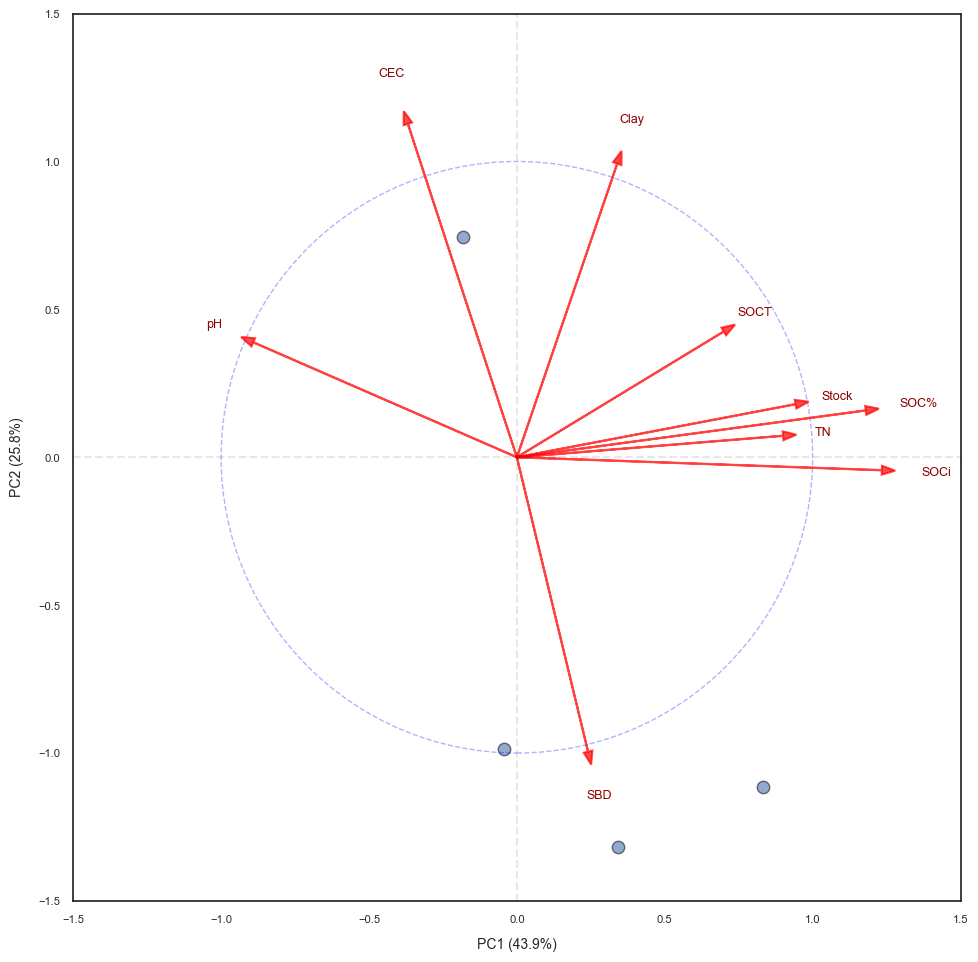

In [123]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 10))
plt.scatter(principal_components[:, 0], principal_components[:, 1], 
            alpha=0.6, edgecolor='k', s=80)

circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--', alpha=0.3)
plt.gca().add_artist(circle)

features = numpss.columns
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

scale_factor = 1.2  

for i, feature in enumerate(features):
    plt.arrow(0, 0, 
              loadings[i, 0] * scale_factor, 
              loadings[i, 1] * scale_factor,
              color='red', alpha=0.7, head_width=0.03, linewidth=1.5)
    plt.text(loadings[i, 0] * scale_factor * 1.15, 
             loadings[i, 1] * scale_factor * 1.15,
             feature, color='darkred', ha='center', va='center',
             fontsize=9, fontweight='normal')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', 
          fontsize=10, labelpad=10)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', 
          fontsize=10, labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=6)
plt.grid(False)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.1)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.1)
plt.gca().set_aspect('equal')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.tight_layout()
plt.show()

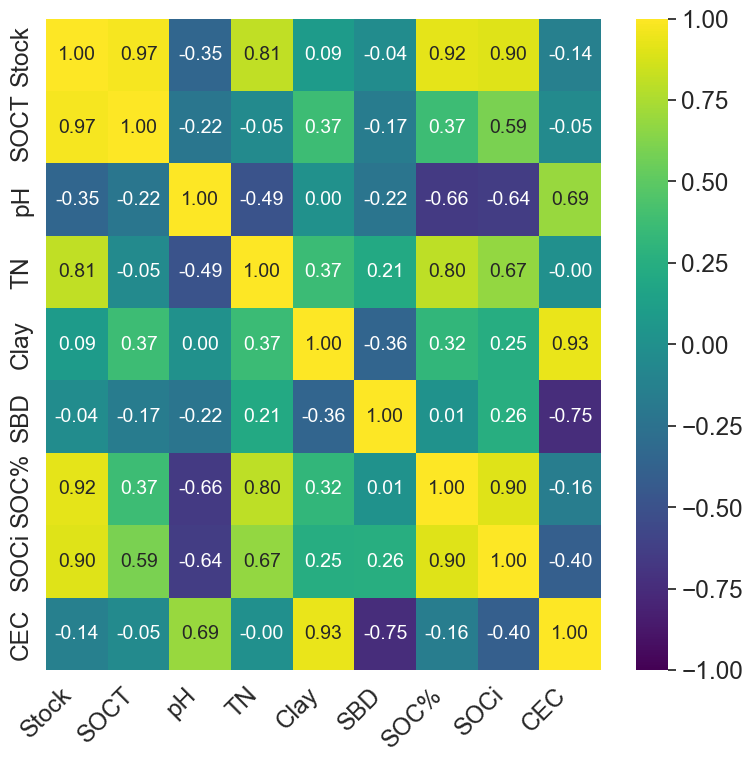

In [124]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', 
                      vmin=-1, vmax=1, center=0, annot_kws={'size': 14}) 

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

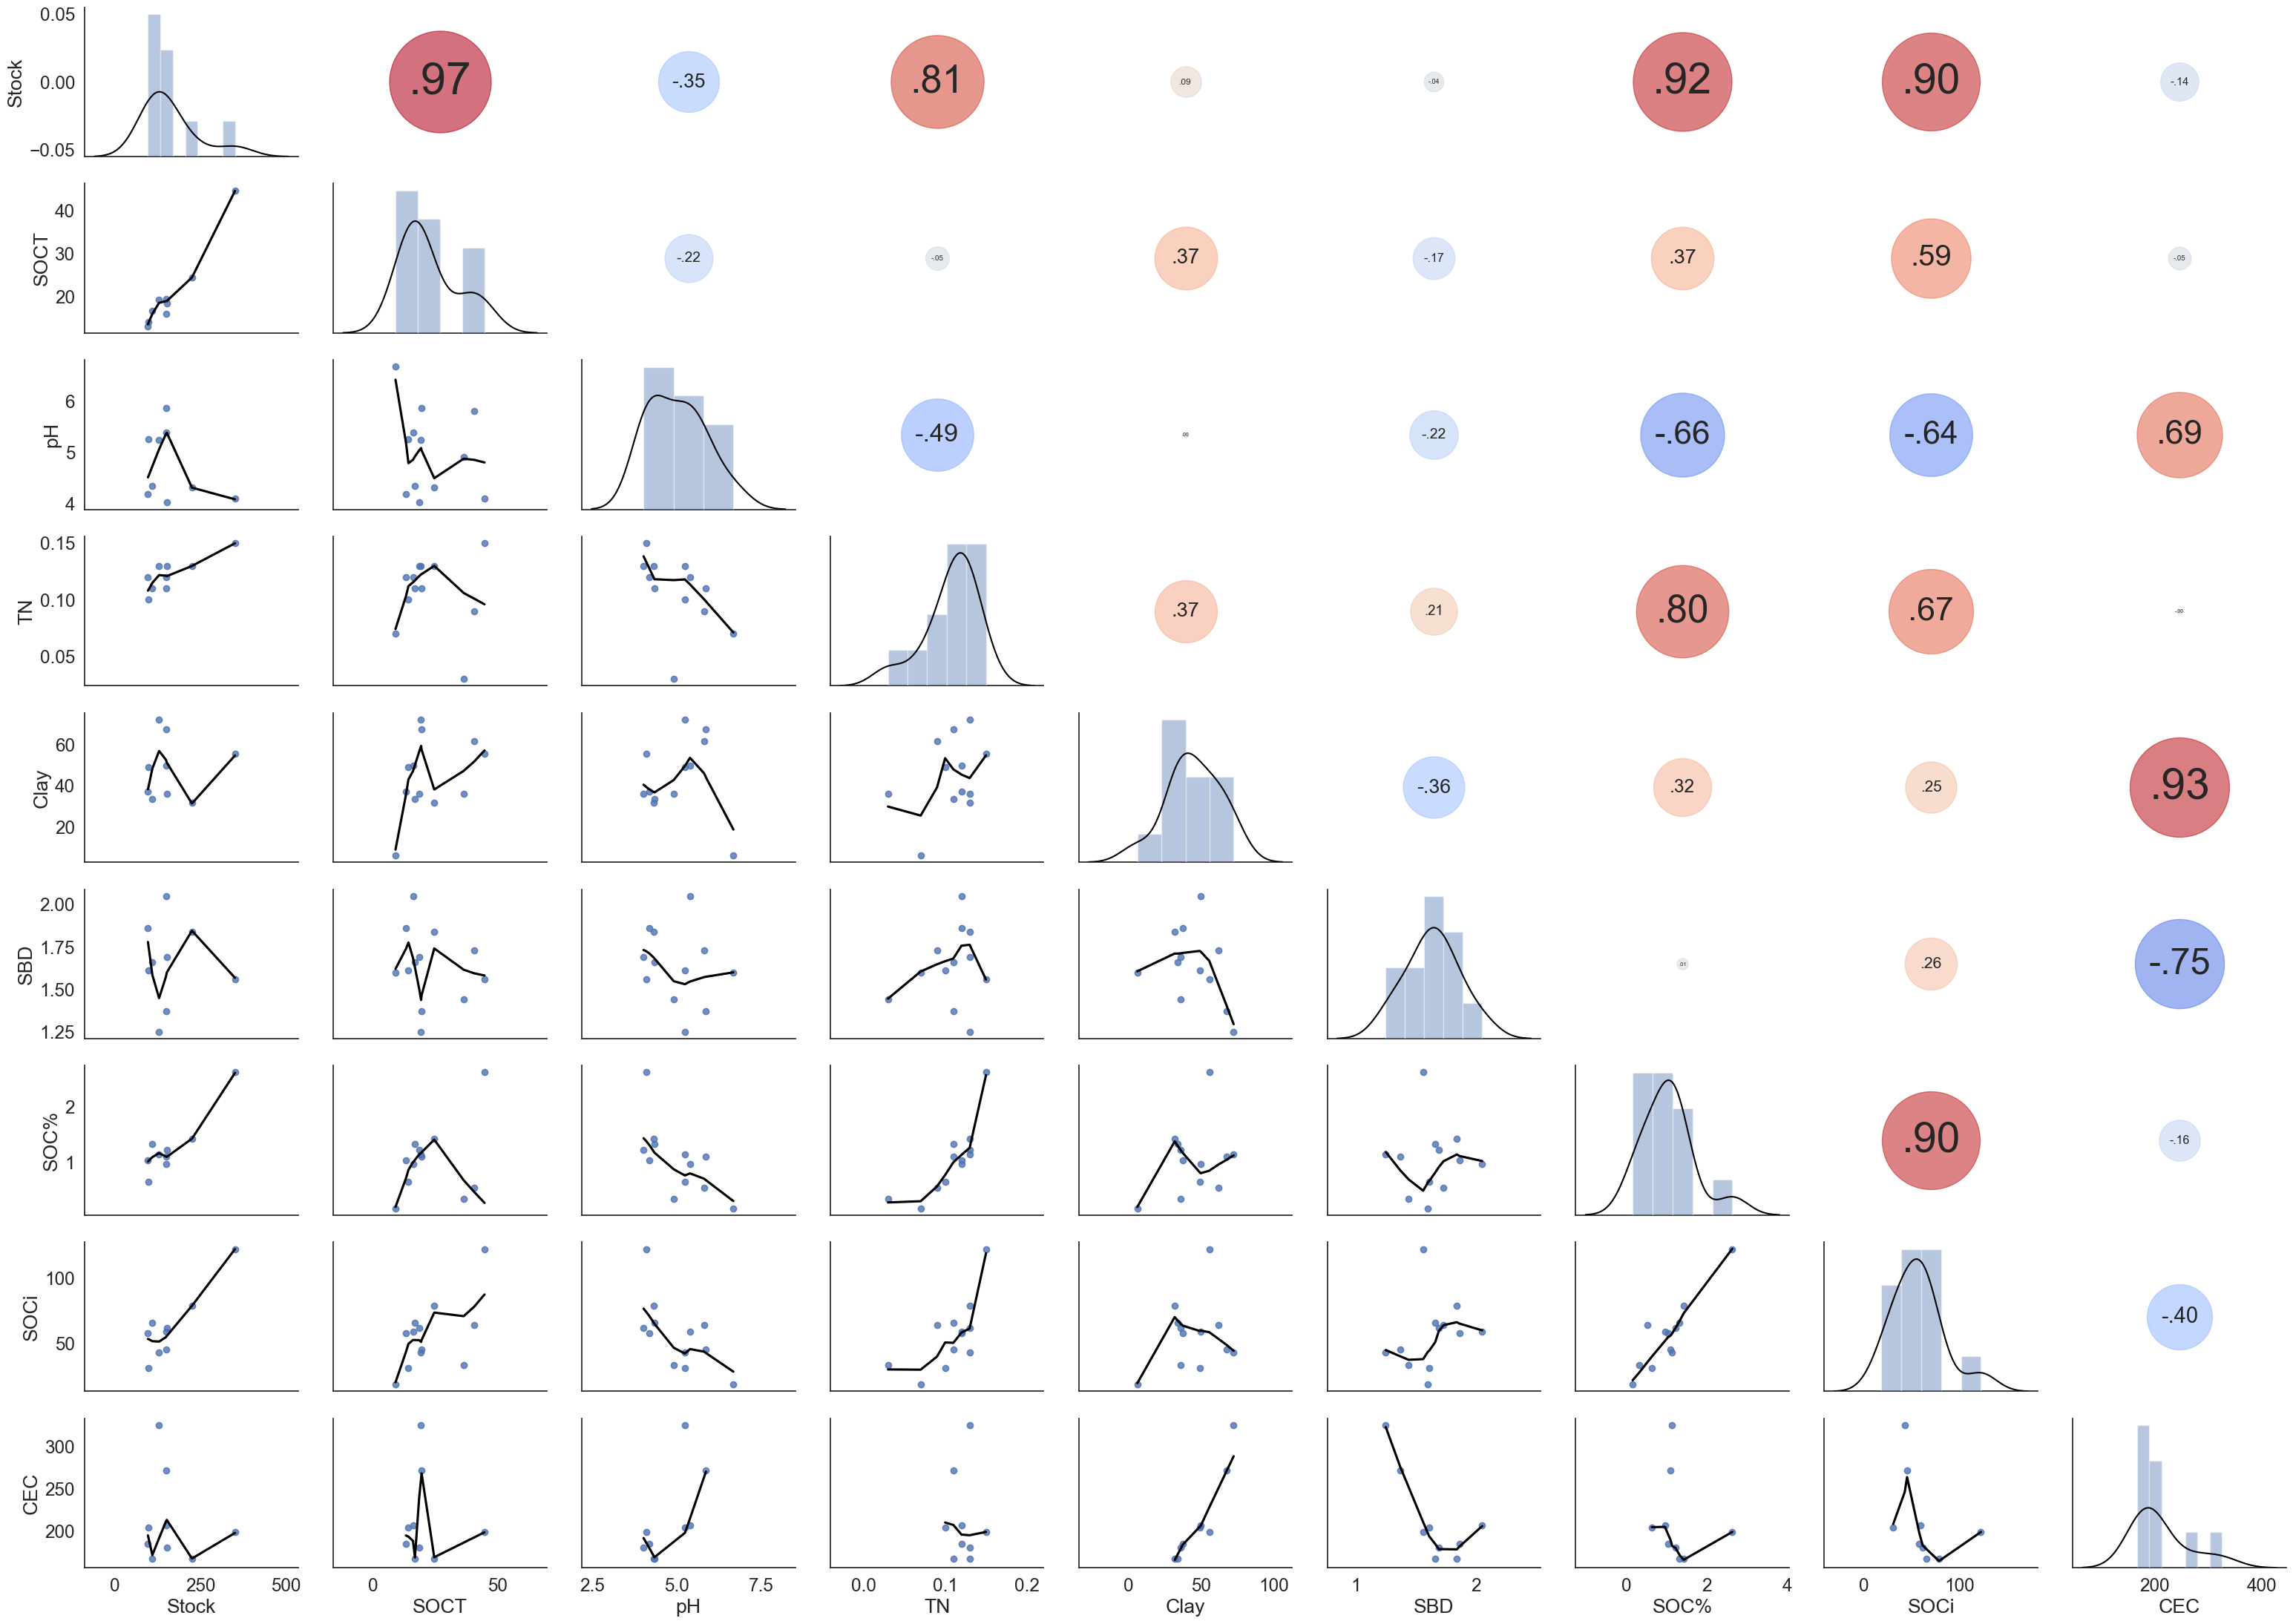

In [125]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(numpvt, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

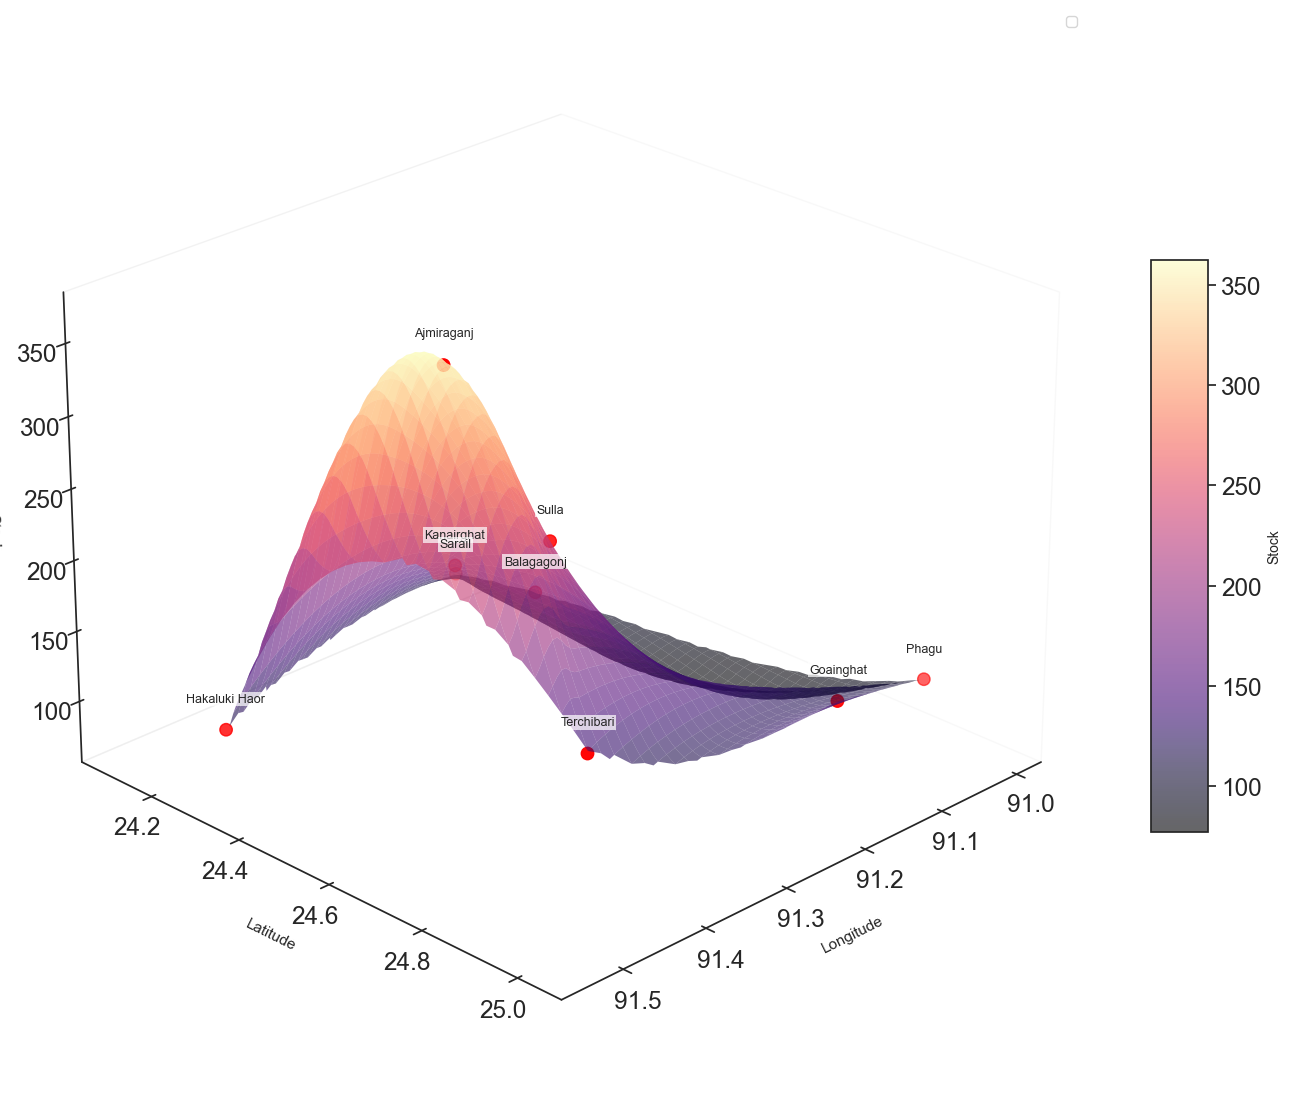

In [188]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

x = df['Longitude']
y = df['Latitude']
z = numpvt['Stock']
site_names = df['Site Name']

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

zi = griddata((x, y), z, (xi, yi), method='cubic')
surf = ax.plot_surface(xi, yi, zi, cmap='magma', alpha=0.6, 
                      linewidth=0, antialiased=True)

scatter = ax.scatter(x, y, z, c='red', s=80, depthshade=True, label='')

# Add site name labels with small offset
for i, name in enumerate(site_names):
    ax.text(x.iloc[i], y.iloc[i], z.iloc[i] + 0.05*z.max(),  # Z-offset for visibility
            name, fontsize=9, ha='center', va='bottom',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# Add color bar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Stock')
cbar.ax.yaxis.label.set_size(10)

ax.set_xlabel('Longitude', fontsize=11, labelpad=12)
ax.set_ylabel('Latitude', fontsize=11, labelpad=12)
ax.set_zlabel('Stock', fontsize=11, labelpad=12)

# Adjust viewing angle and legend
ax.view_init(elev=25, azim=45)
ax.legend(fontsize=10, loc='upper right')

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
plt.show()

## Subsoil

In [186]:
numpvs = pvs[['Stock', 'SOCT', 'pH',
       'TN', 'Clay', 'SBD', 'SOC%', 'SOCi', 'CEC']]

In [187]:
numpvs = numpvs[:9]
numpvs

Stock   SOCT    pH    TN   Clay   SBD  SOC%    SOCi     CEC
0  351.12  44.63  3.97  0.08  46.66  1.78  1.83  228.43  235.79
1  148.71  15.90  6.14  0.08  41.66  2.03  0.63   89.67  151.29
2  149.65  19.37  6.54  0.09  39.24  1.78  0.84  104.44  159.84
3  109.14  16.70  5.28  0.04  28.57  1.80  0.35   43.35  127.84
4  151.46  18.37  5.54  0.07  32.70  2.08  0.62   89.79  138.46
5   98.34  14.08  5.83  0.07  63.41  1.25  0.77   67.67  241.66
6   96.25  13.10  5.22  0.13  23.26  2.00  0.28   38.50  115.65
7  225.03  24.45  5.27  0.08  29.50  2.05  1.02  146.37  152.49
8  128.83  19.17  6.47  0.12  53.34  1.58  0.78   86.08  235.72

In [127]:
numpvs.describe()

Stock       SOCT         pH         TN       Clay        SBD  \
count    9.000000  12.000000  12.000000  12.000000  12.000000  12.000000   
mean   162.058889  22.624167   4.206667   8.257500  30.251667   1.512500   
std     80.970248  11.558082   2.582051  17.862259  20.539641   0.614508   
min     96.250000   8.880000   0.070000   0.040000   1.480000   0.200000   
25%    109.140000  15.445000   2.997500   0.077500  17.862500   1.140000   
50%    148.710000  18.770000   5.275000   0.085000  31.100000   1.780000   
75%    151.460000  27.402500   5.907500   1.597500  42.910000   2.007500   
max    351.120000  44.630000   6.540000  50.000000  63.410000   2.080000   

            SOC%        SOCi         CEC  
count  12.000000   12.000000    9.000000  
mean    2.093333   91.282500  173.193333  
std     2.807682   54.358203   50.220602  
min     0.280000   26.800000  115.650000  
25%     0.627500   61.590000  138.460000  
50%     0.810000   87.875000  152.490000  
75%     1.872500  104.520000  235.720000  
max     8.100000  228.430000  241.660000

In [128]:
corr = numpvs.corr()
corr

Stock      SOCT        pH        TN      Clay       SBD      SOC%  \
Stock  1.000000  0.973213 -0.681202 -0.107798  0.051639  0.202245  0.928803   
SOCT   0.973213  1.000000 -0.430110  0.612430 -0.211607 -0.110840  0.684069   
pH    -0.681202 -0.430110  1.000000 -0.799502  0.847787  0.843940 -0.829002   
TN    -0.107798  0.612430 -0.799502  1.000000 -0.696340 -0.607489  0.987142   
Clay   0.051639 -0.211607  0.847787 -0.696340  1.000000  0.585122 -0.676978   
SBD    0.202245 -0.110840  0.843940 -0.607489  0.585122  1.000000 -0.632022   
SOC%   0.928803  0.684069 -0.829002  0.987142 -0.676978 -0.632022  1.000000   
SOCi   0.980299  0.713501  0.127598 -0.058848  0.321343  0.341148  0.042198   
CEC    0.341327  0.439327 -0.034545  0.089234  0.916662 -0.773065  0.638717   

           SOCi       CEC  
Stock  0.980299  0.341327  
SOCT   0.713501  0.439327  
pH     0.127598 -0.034545  
TN    -0.058848  0.089234  
Clay   0.321343  0.916662  
SBD    0.341148 -0.773065  
SOC%   0.042198  0.638717  
SOCi   1.000000  0.454368  
CEC    0.454368  1.000000

In [129]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(numpvs)

X_imputed = pd.DataFrame(X_imputed, columns=numpss.columns)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

loadings = pd.DataFrame(pca.components_.T,
                       columns=['PC1', 'PC2', "PC3"],
                       index=features)
print("\nPCA Loadings:")
print(loadings)

Explained variance ratio: [0.47978286 0.31330615 0.12984049]
Total explained variance: 0.9229294963368981

PCA Loadings:
            PC1       PC2       PC3
Stock  0.094016  0.518693 -0.173155
SOCT   0.295231  0.429645 -0.171986
pH    -0.457529  0.072108 -0.047870
TN     0.449104 -0.033121 -0.037861
Clay  -0.383907  0.239465  0.337934
SBD   -0.364214  0.159759 -0.484041
SOC%   0.460757  0.032706 -0.007909
SOCi  -0.002331  0.581172 -0.163802
CEC    0.025172  0.344049  0.749216


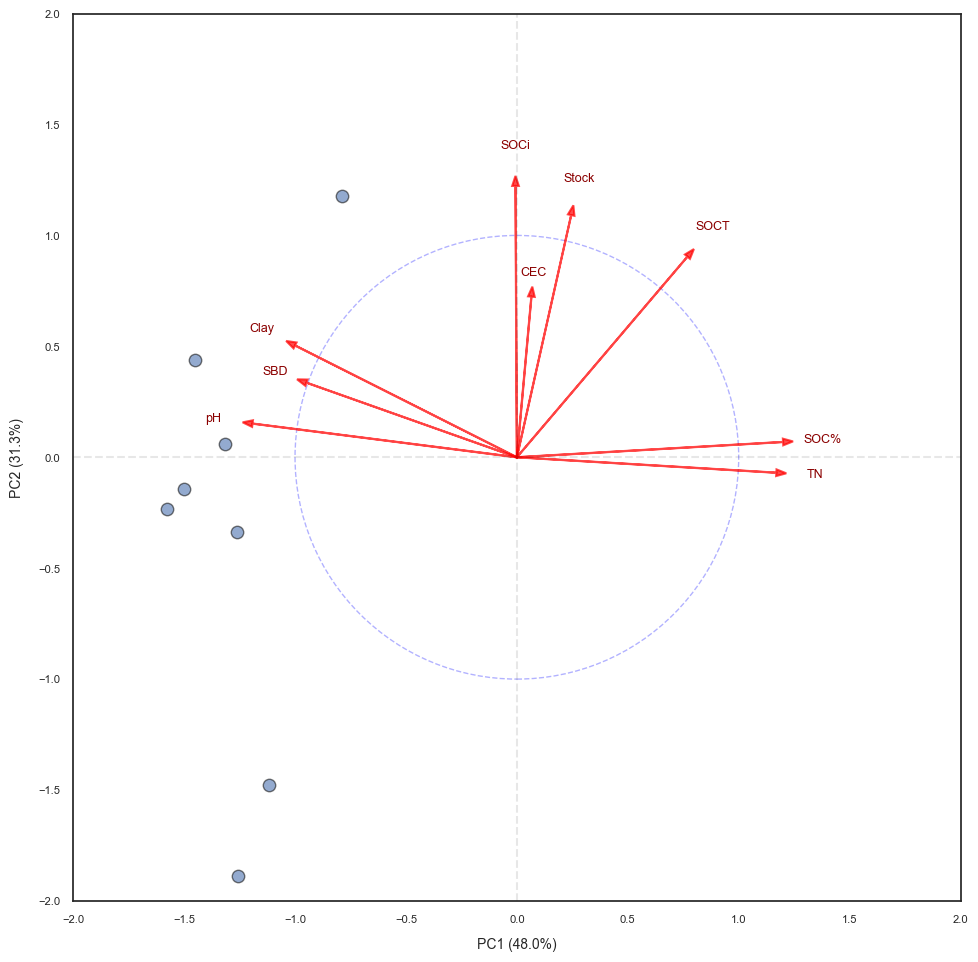

In [131]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 10))
plt.scatter(principal_components[:, 0], principal_components[:, 1], 
            alpha=0.6, edgecolor='k', s=80)

circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--', alpha=0.3)
plt.gca().add_artist(circle)

features = numpvs.columns
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

scale_factor = 1.2  

for i, feature in enumerate(features):
    plt.arrow(0, 0, 
              loadings[i, 0] * scale_factor, 
              loadings[i, 1] * scale_factor,
              color='red', alpha=0.7, head_width=0.03, linewidth=1.5)
    plt.text(loadings[i, 0] * scale_factor * 1.15, 
             loadings[i, 1] * scale_factor * 1.15,
             feature, color='darkred', ha='center', va='center',
             fontsize=9, fontweight='normal')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', 
          fontsize=10, labelpad=10)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', 
          fontsize=10, labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=6)
plt.grid(False)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.1)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.1)
plt.gca().set_aspect('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.tight_layout()
plt.show()

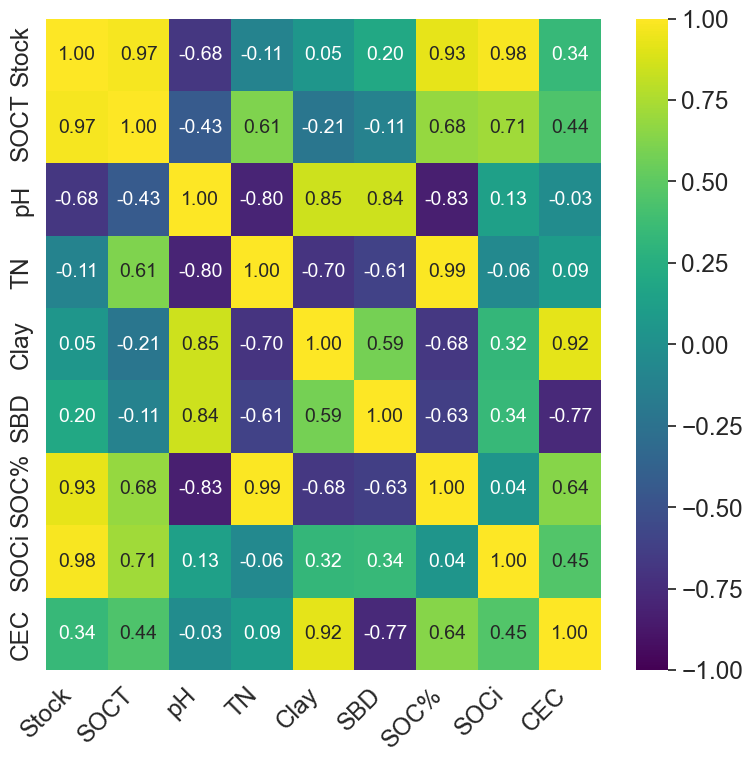

In [132]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', 
                      vmin=-1, vmax=1, center=0, annot_kws={'size': 14}) 

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

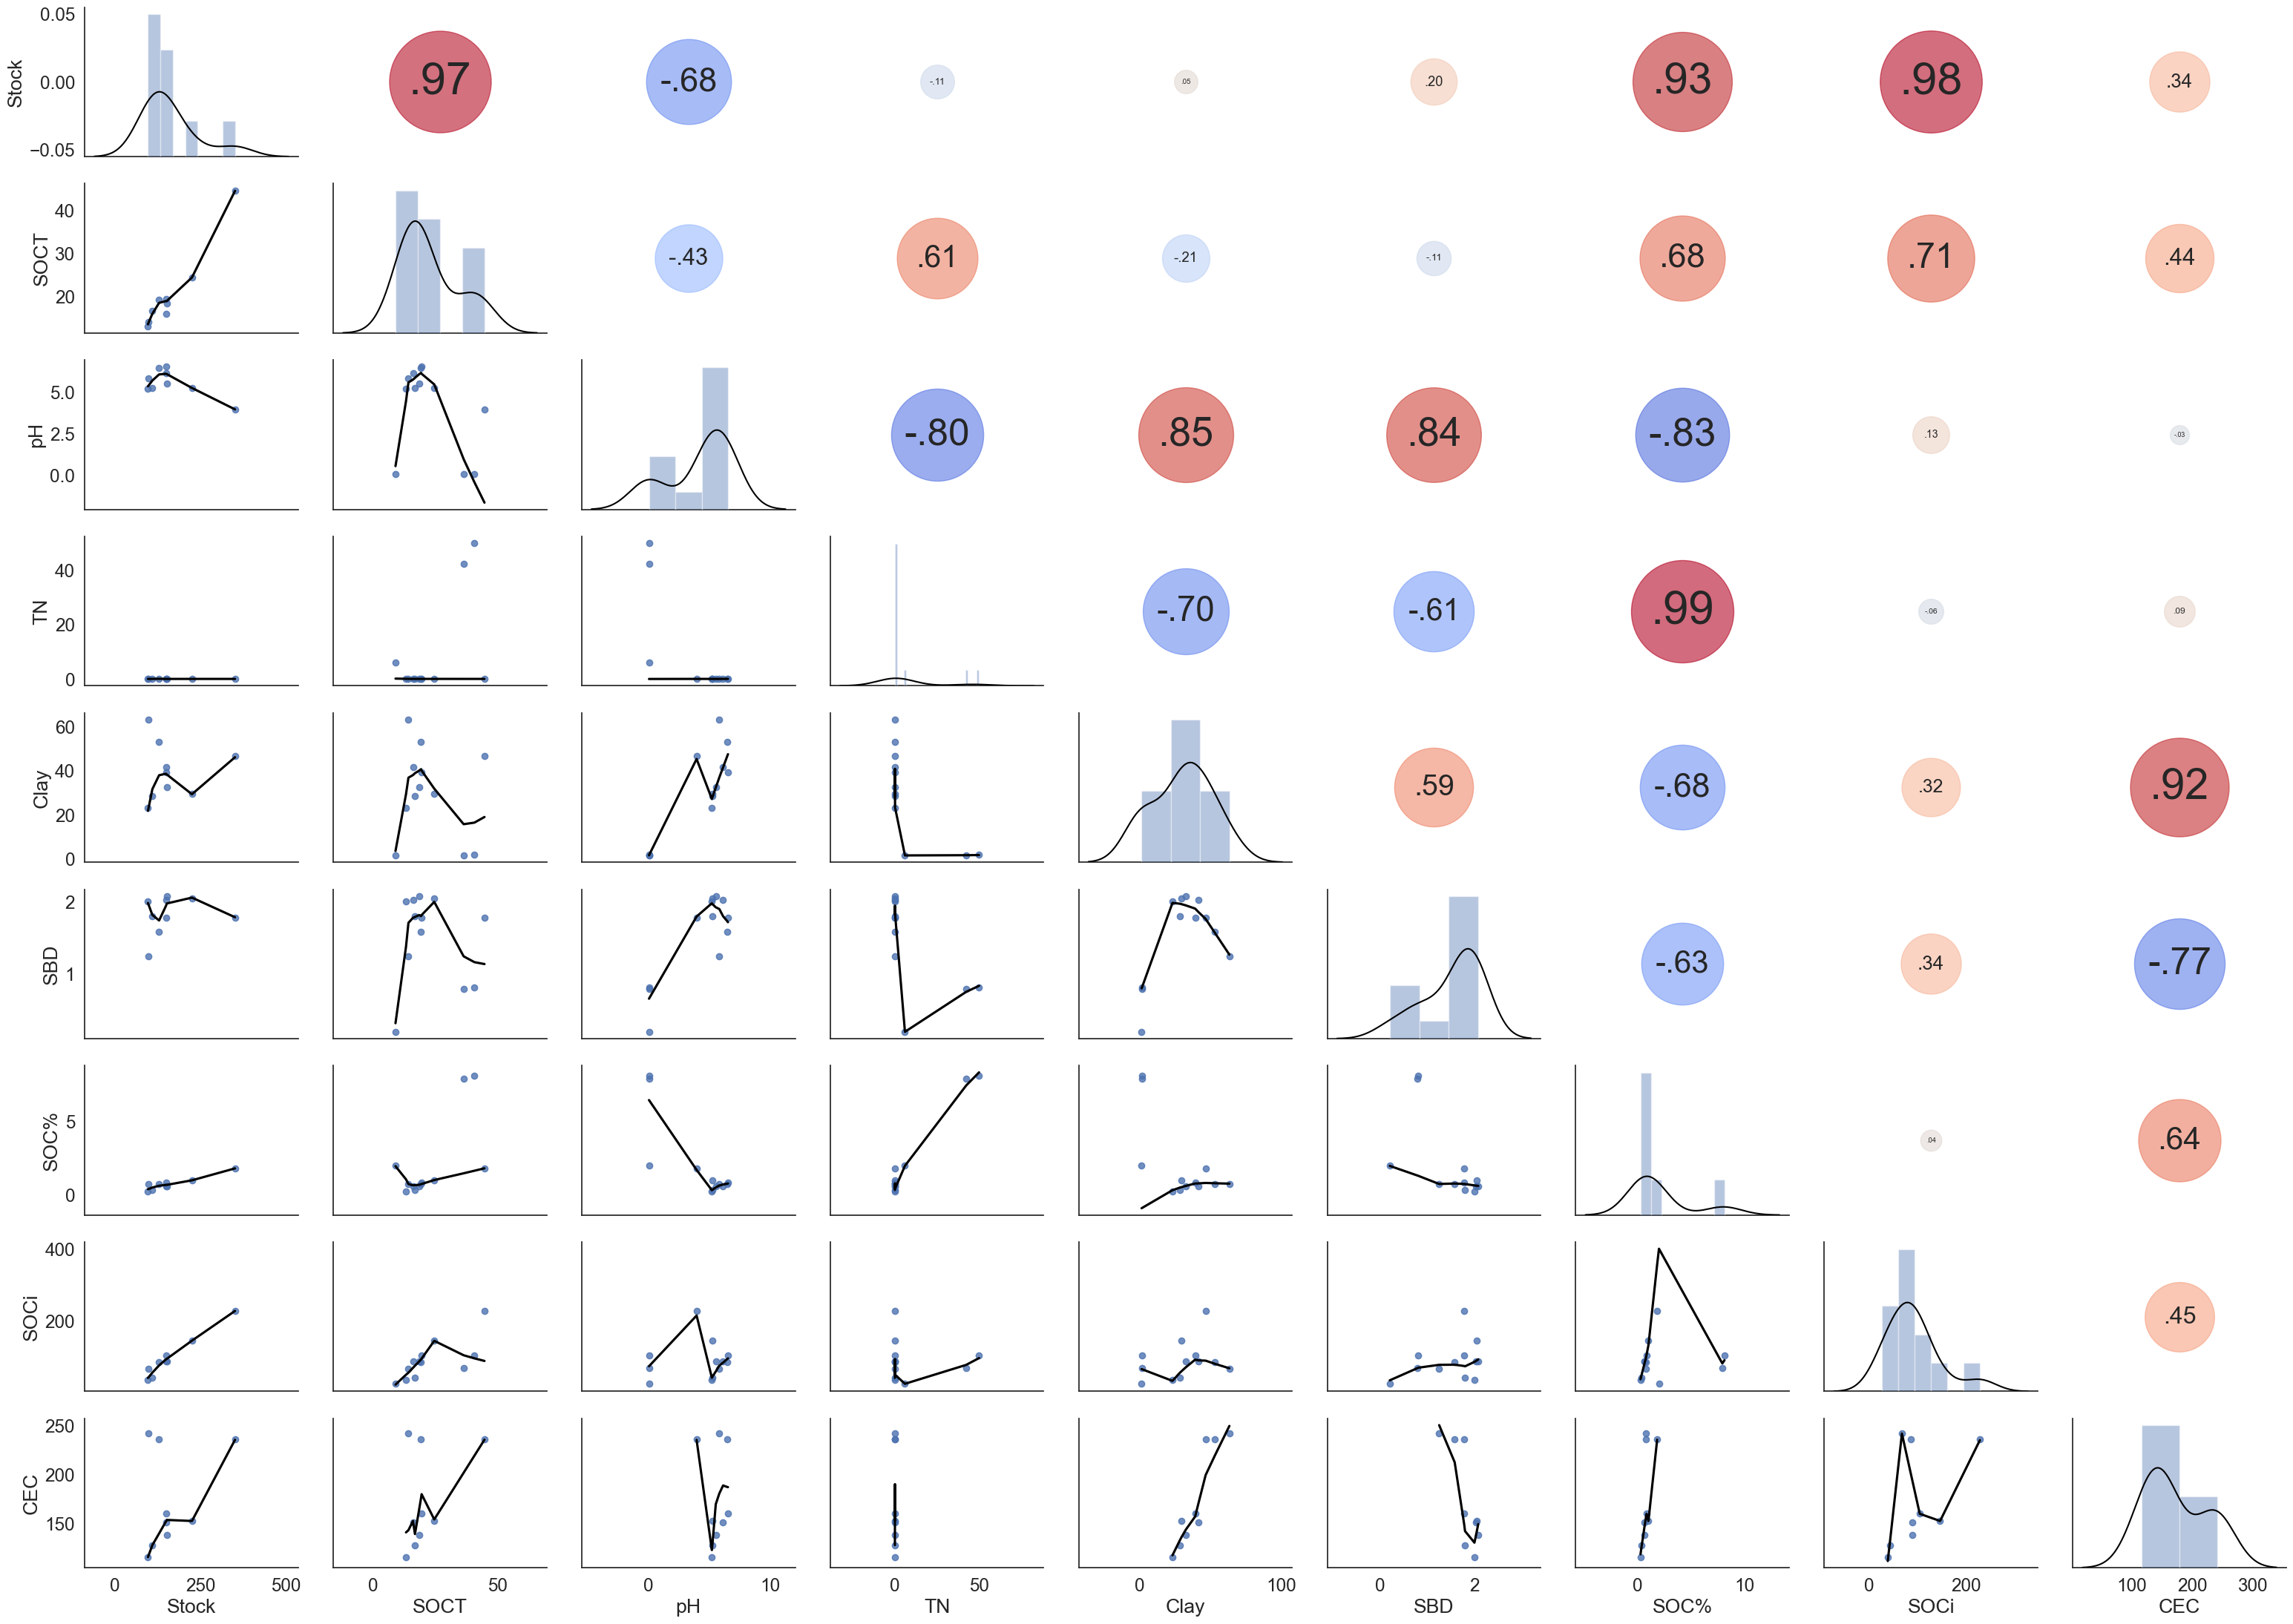

In [133]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(numpvs, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

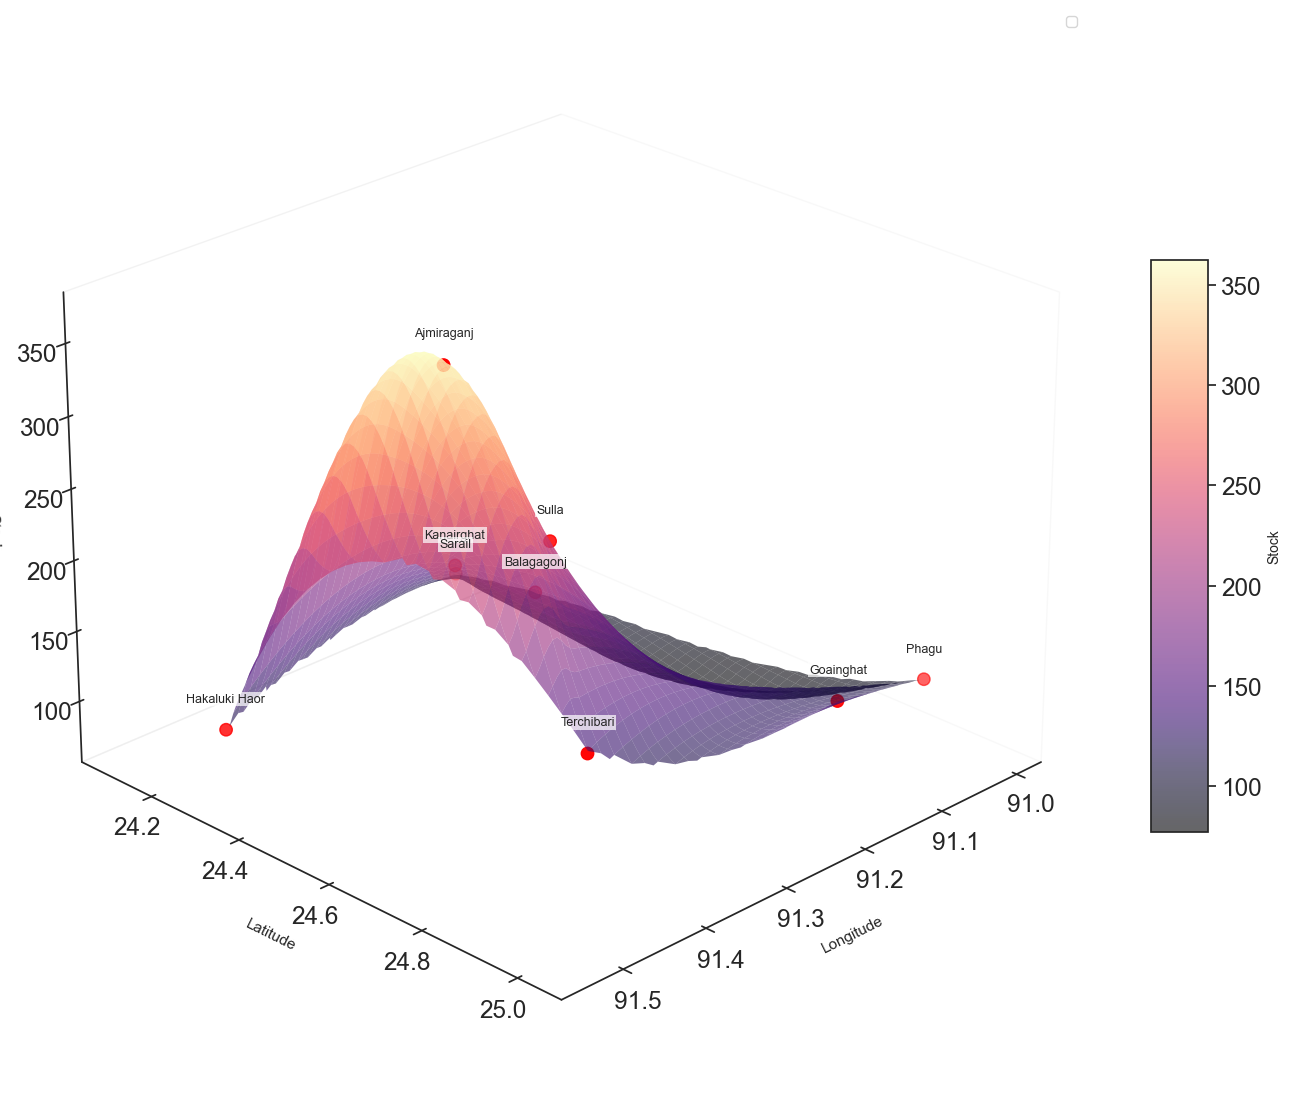

In [189]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

x = df['Longitude']
y = df['Latitude']
z = numpvs['Stock']
site_names = df['Site Name']

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

zi = griddata((x, y), z, (xi, yi), method='cubic')
surf = ax.plot_surface(xi, yi, zi, cmap='magma', alpha=0.6, 
                      linewidth=0, antialiased=True)

scatter = ax.scatter(x, y, z, c='red', s=80, depthshade=True, label='')

# Add site name labels with small offset
for i, name in enumerate(site_names):
    ax.text(x.iloc[i], y.iloc[i], z.iloc[i] + 0.05*z.max(),  # Z-offset for visibility
            name, fontsize=9, ha='center', va='bottom',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# Add color bar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Stock')
cbar.ax.yaxis.label.set_size(10)

ax.set_xlabel('Longitude', fontsize=11, labelpad=12)
ax.set_ylabel('Latitude', fontsize=11, labelpad=12)
ax.set_zlabel('Stock', fontsize=11, labelpad=12)

# Adjust viewing angle and legend
ax.view_init(elev=25, azim=45)
ax.legend(fontsize=10, loc='upper right')

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
plt.show()